In [1]:
import numpy as np
import pandas as pd

#plot
import matplotlib.pyplot as plt
import seaborn as sns

# dados
import kagglehub
from pathlib import Path
import zipfile


c:\Users\ander\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def img_save(file_name):
    plt.savefig(f"../images/Anderson/{file_name}.png", dpi=300, bbox_inches='tight')
    plt.close()


In [3]:
path = kagglehub.dataset_download("vinayakshanawad/heart-rate-prediction-to-monitor-stress-level")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ander\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1


In [4]:
p = Path(path)

train_path = p / "Train Data" / "Train Data Zip"
test_path = p / "Test Data" / "Test Zip"

train_files = list(train_path.rglob("*.csv"))
print("Arquivos de treino:", train_files)

print()

test_files = list(test_path.rglob("*.csv"))
print("Arquivos de teste:", test_files)


Arquivos de treino: [WindowsPath('C:/Users/ander/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Train Data/Train Data Zip/frequency_domain_features_train.csv'), WindowsPath('C:/Users/ander/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Train Data/Train Data Zip/heart_rate_non_linear_features_train.csv'), WindowsPath('C:/Users/ander/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Train Data/Train Data Zip/time_domain_features_train.csv')]

Arquivos de teste: [WindowsPath('C:/Users/ander/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Test Data/Test Zip/frequency_domain_features_test.csv'), WindowsPath('C:/Users/ander/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Test Data/Test Zip/heart_rate_non_linear_features_test.csv'), WindowsPa

In [5]:
# verificar se tem arquivo ou diretório no caminho
for file in train_path.iterdir():
    print(file, "->", "dir" if file.is_dir() else "file")

C:\Users\ander\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1\Train Data\Train Data Zip\frequency_domain_features_train.csv -> file
C:\Users\ander\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1\Train Data\Train Data Zip\heart_rate_non_linear_features_train.csv -> file
C:\Users\ander\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1\Train Data\Train Data Zip\time_domain_features_train.csv -> file


### Ajustando treino

In [6]:
# treino não linear
train_nonL = [f for f in train_files if "non_linear" in f.name.lower()][0]

df_train_nonL = pd.read_csv(train_nonL)
print(df_train_nonL.shape)
print(df_train_nonL.columns)
print(df_train_nonL.dtypes)

(369289, 7)
Index(['uuid', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'condition'], dtype='object')
uuid          object
SD1          float64
SD2          float64
sampen       float64
higuci       float64
datasetId      int64
condition     object
dtype: object


In [7]:
# treino no domínio do tempo
train_time = [f for f in train_files if "time_domain" in f.name.lower()][0]

df_train_time = pd.read_csv(train_time)
print(df_train_time.shape)
print(df_train_time.columns)
print(df_train_time.dtypes)

(369289, 20)
Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid'],
      dtype='object')
MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
HR                   float64
pNN25                float64
pNN50                float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR          float64
SKEW_REL_RR          float64
uuid                  object
dtype: object


In [8]:
# treino no domínio do freq
train_freq = [f for f in train_files if "frequency_domain" in f.name.lower()][0]

df_train_freq = pd.read_csv(train_freq)
print(df_train_freq.shape)
print(df_train_freq.columns)
print(df_train_freq.dtypes)


(369289, 12)
Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF'],
      dtype='object')
uuid        object
VLF        float64
VLF_PCT    float64
LF         float64
LF_PCT     float64
LF_NU      float64
HF         float64
HF_PCT     float64
HF_NU      float64
TP         float64
LF_HF      float64
HF_LF      float64
dtype: object


In [9]:
# verificando existencia de uuid duplicados:
print(f'No conjunto não linear:\n {df_train_nonL['uuid'].is_unique}')
print()
print(f'No conjunto do dominio do tempo:\n {df_train_time['uuid'].is_unique}')
print()
print(f'No conjunto do dominio da frequencia:\n {df_train_freq['uuid'].is_unique}')


No conjunto não linear:
 True

No conjunto do dominio do tempo:
 True

No conjunto do dominio da frequencia:
 True


In [10]:
# merge treino com uuid:
df_train_p1 = df_train_time.merge(df_train_freq, on='uuid', how='inner',validate='one_to_one')
df_train = df_train_p1.merge(df_train_nonL, on='uuid', how='inner',validate='one_to_one')

print(df_train.shape)
print(df_train.columns)
print(df_train.dtypes)

(369289, 37)
Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT',
       'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2',
       'sampen', 'higuci', 'datasetId', 'condition'],
      dtype='object')
MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
HR                   float64
pNN25                float64
pNN50                float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR          float64
SKEW_REL

### Ajustando teste

In [11]:
# teste não linear
test_nonL = [f for f in test_files if "non_linear" in f.name.lower()][0]

df_test_nonL = pd.read_csv(test_nonL)
print(df_test_nonL.shape)
print(df_test_nonL.columns)
print(df_test_nonL.dtypes)

(41033, 7)
Index(['uuid', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'condition'], dtype='object')
uuid          object
SD1          float64
SD2          float64
sampen       float64
higuci       float64
datasetId      int64
condition     object
dtype: object


In [12]:
test_freq = [f for f in test_files if "frequency_domain" in f.name.lower()][0]

df_test_freq = pd.read_csv(test_freq)
print(df_test_freq.shape)
print(df_test_freq.columns)
print(df_test_freq.dtypes)

(41033, 12)
Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF'],
      dtype='object')
uuid        object
VLF        float64
VLF_PCT    float64
LF         float64
LF_PCT     float64
LF_NU      float64
HF         float64
HF_PCT     float64
HF_NU      float64
TP         float64
LF_HF      float64
HF_LF      float64
dtype: object


In [13]:
# teste no domínio do tempo
test_time = [f for f in test_files if "time_domain" in f.name.lower()][0]

df_test_time = pd.read_csv(test_time)
print(df_test_time.shape)
print(df_test_time.columns)
print(df_test_time.dtypes)


(41033, 19)
Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25',
       'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR',
       'SKEW_REL_RR', 'uuid'],
      dtype='object')
MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
pNN25                float64
pNN50                float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR          float64
SKEW_REL_RR          float64
uuid                  object
dtype: object


In [14]:
# verificando existencia de uuid duplicados:
print(f'No conjunto não linear:\n {df_test_nonL['uuid'].is_unique}')
print()
print(f'No conjunto do dominio do tempo:\n {df_test_time['uuid'].is_unique}')
print()
print(f'No conjunto do dominio da frequencia:\n {df_test_freq['uuid'].is_unique}')


No conjunto não linear:
 True

No conjunto do dominio do tempo:
 True

No conjunto do dominio da frequencia:
 True


In [15]:
# merge test com uuid:
df_test_p1 = df_test_time.merge(df_test_freq, on='uuid', how='inner',validate='one_to_one')
df_test = df_test_p1.merge(df_test_nonL, on='uuid', how='inner',validate='one_to_one')

print(df_test.shape)
print(df_test.columns)
print(df_test.dtypes)

(41033, 36)
Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25',
       'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR',
       'SKEW_REL_RR', 'uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF',
       'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen',
       'higuci', 'datasetId', 'condition'],
      dtype='object')
MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
pNN25                float64
pNN50                float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR          float64
SKEW_REL_RR          float64
uuid           

### Unindo em df único

In [16]:
# união p/ eda
df_time = pd.concat([df_train, df_test], ignore_index=True)


print(df_time.shape)
#print(df_time.value_counts())
df_time.head()

(410322, 37)


MEAN_RR   MEDIAN_RR        SDRR      RMSSD       SDSD  SDRR_RMSSD  \
0  885.157845  853.763730  140.972741  15.554505  15.553371    9.063146   
1  939.425371  948.357865   81.317742  12.964439  12.964195    6.272369   
2  898.186047  907.006860   84.497236  16.305279  16.305274    5.182201   
3  881.757865  893.460030   90.370537  15.720468  15.720068    5.748591   
4  809.625331  811.184865   62.766242  19.213819  19.213657    3.266724   

          HR      pNN25     pNN50      KURT  ...     HF_NU           TP  \
0  69.499952  11.133333  0.533333 -0.856554  ...  1.514737  3686.666157   
1  64.363150   5.600000  0.000000 -0.408190  ...  0.304603  3006.487251   
2  67.450066  13.066667  0.200000  0.351789  ...  1.049528  2685.879461   
3  68.809562  11.800000  0.133333 -0.504947  ...  1.775294  3434.520980   
4  74.565728  20.200000  0.200000 -0.548408  ...  3.279993  2621.175204   

        LF_HF     HF_LF        SD1         SD2    sampen    higuci  datasetId  \
0   65.018055  0.015380  11.001565  199.061782  2.139754  1.163485          2   
1  327.296635  0.003055   9.170129  114.634458  2.174499  1.084711          2   
2   94.280910  0.010607  11.533417  118.939253  2.135350  1.176315          2   
3   55.328701  0.018074  11.119476  127.318597  2.178341  1.179688          2   
4   29.487873  0.033912  13.590641   87.718281  2.221121  1.249612          2   

      condition  
0     no stress  
1  interruption  
2  interruption  
3     no stress  
4     no stress  

[5 rows x 37 columns]

In [17]:
df_time.isna().sum()

MEAN_RR                  0
MEDIAN_RR                0
SDRR                     0
RMSSD                    0
SDSD                     0
SDRR_RMSSD               0
HR                   41033
pNN25                    0
pNN50                    0
KURT                     0
SKEW                     0
MEAN_REL_RR              0
MEDIAN_REL_RR            0
SDRR_REL_RR              0
RMSSD_REL_RR             0
SDSD_REL_RR              0
SDRR_RMSSD_REL_RR        0
KURT_REL_RR              0
SKEW_REL_RR              0
uuid                     0
VLF                      0
VLF_PCT                  0
LF                       0
LF_PCT                   0
LF_NU                    0
HF                       0
HF_PCT                   0
HF_NU                    0
TP                       0
LF_HF                    0
HF_LF                    0
SD1                      0
SD2                      0
sampen                   0
higuci                   0
datasetId                0
condition                0
d

## Trabalhando só com treino 

In [18]:
df = df_train.copy()

rascunho

In [24]:
df.groupby('condition')[['MEAN_RR', 'RMSSD']].mean().round(2)


MEAN_RR  RMSSD
condition                    
interruption    861.56  16.36
no stress       812.93  14.18
time pressure   927.50  15.21

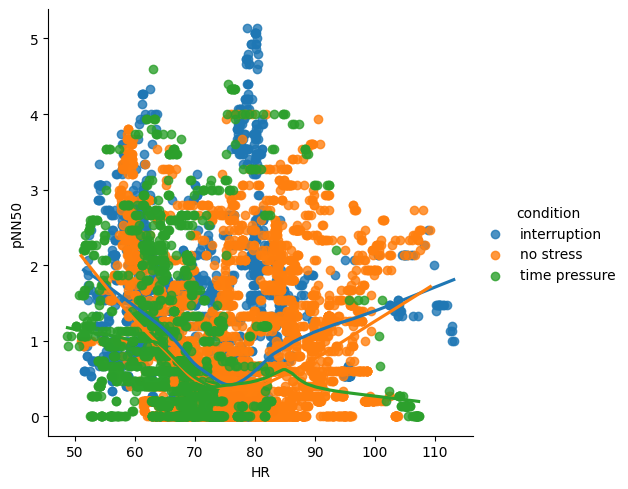

In [32]:
df_s = df.sample(10000, random_state=42)
sns.lmplot(data=df_s, x='HR', y='pNN50', hue='condition', lowess=True)



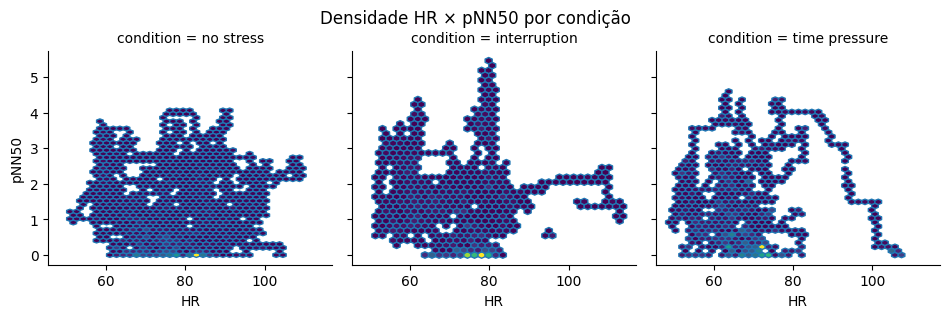

In [36]:

g = sns.FacetGrid(df, col='condition', col_wrap=3, height=3.2, sharex=True, sharey=True)
# opção A: hexbin (rápido e claro)
g.map_dataframe(plt.hexbin, 'HR', 'pNN50', gridsize=35, mincnt=1)
for ax in g.axes.flatten():
    ax.set_xlabel('HR'); ax.set_ylabel('pNN50')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Densidade HR × pNN50 por condição')
plt.show()

# (alternativa) KDE 2D por painel:
# g.map_dataframe(sns.kdeplot, x='HR', y='pNN50', fill=True, levels=10, thresh=0.05)


C:\Users\ander\AppData\Local\Temp\ipykernel_57832\2390954432.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='LF_HF', data=df, palette=custom_palette)


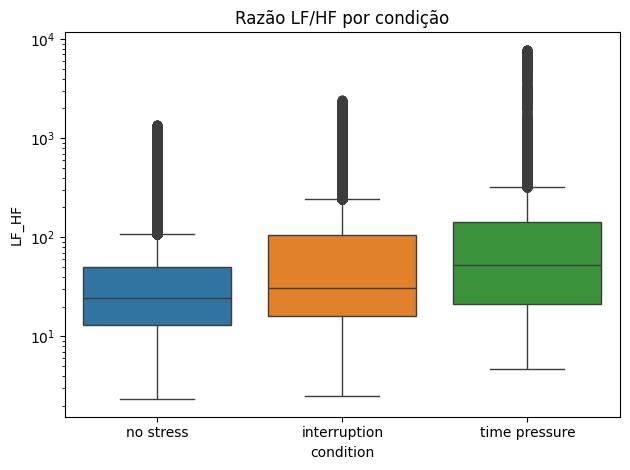

In [ ]:
custom_palette = {
    'no stress': '#1f77b4',     # azul padrão Seaborn
    'interruption': '#ff7f0e',  # laranja
    'time pressure': '#2ca02c'  # verde
}

sns.boxplot(x='condition', y='LF_HF', data=df, palette=custom_palette)
plt.yscale('log')
plt.title('Razão LF/HF por condição')
plt.tight_layout()
img_save('box_lf_hf_condition_logscale')


In [41]:
sns.boxplot(
    x='condition', y='HF_LF', data=df,
    palette={'no stress': '#1f77b4', 'interruption': '#ff7f0e', 'time pressure': '#2ca02c'},
    showfliers=False
)
plt.yscale('log')
plt.title('Razão HF/LF por condição')
plt.tight_layout()
img_save('box_hf_lf_condition_logscale')

C:\Users\ander\AppData\Local\Temp\ipykernel_57832\2649167072.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='HR', ylabel='pNN50'>

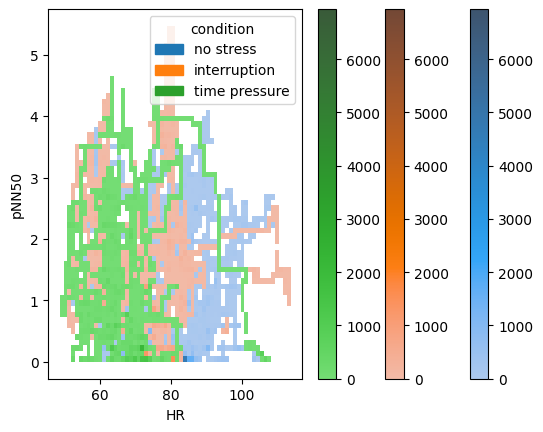

In [33]:
sns.histplot(data=df, x='HR', y='pNN50', hue='condition', bins=60, pmax=0.9, cbar=True)


In [43]:

# paleta consistente com os outros gráficos
palette = {
    'no stress': '#1f77b4',     # azul
    'interruption': '#ff7f0e',  # laranja
    'time pressure': '#2ca02c'  # verde
}

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

# --- Boxplot de TP ---
sns.boxplot(
    x='condition', y='TP', data=df,
    palette=palette, ax=axes[0], showfliers=False
)
axes[0].set_yscale('log')
axes[0].set_title('Potência total (TP)')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# --- Boxplot de VLF_PCT ---
sns.boxplot(
    x='condition', y='VLF_PCT', data=df,
    palette=palette, ax=axes[1], showfliers=False
)
axes[1].set_title('Componente de muito baixa frequência (VLF_PCT)')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('box_tp_vlfpct_condition.png', dpi=300)
img_save('box_tp_vlfpct_condition')


C:\Users\ander\AppData\Local\Temp\ipykernel_57832\3404750010.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ander\AppData\Local\Temp\ipykernel_57832\3404750010.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


In [44]:
# Amostragem leve (mantém padrões visuais idênticos)
df_sample = df.sample(10000, random_state=42)
sns.kdeplot(data=df_sample, x='RMSSD', y='HR', hue='condition',
            fill=True, alpha=0.3, thresh=0.1)
img_save('kde_hr_rmssd_condition')


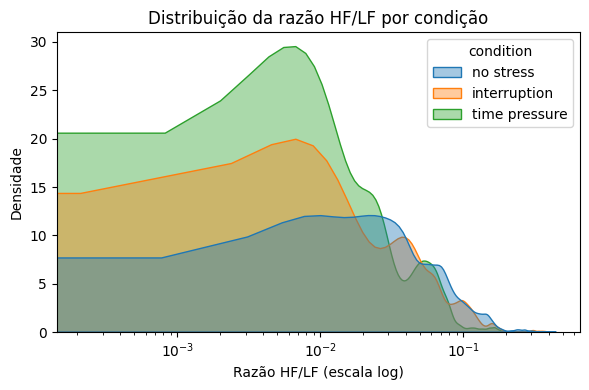

In [39]:
plt.figure(figsize=(6,4))
sns.kdeplot(
    data=df,
    x='HF_LF',
    hue='condition',
    fill=True,
    common_norm=False,
    alpha=0.4,
    bw_adjust=1.2,
    palette={'no stress': '#1f77b4', 'interruption': '#ff7f0e', 'time pressure': '#2ca02c'}
)
plt.xscale('log')
plt.xlabel('Razão HF/LF (escala log)')
plt.ylabel('Densidade')
plt.title('Distribuição da razão HF/LF por condição')
plt.tight_layout()
plt.show()


### *Describe your dataset and its features, identifying the number of observations $N$, number of predictor variables $D$, number of classes $L$ and class-distribution (that is, the number of observations for each of the classes).*

In [ ]:
print(f'N = {df.shape[0]} e D = {df.shape[1]-1}')
print(f'Quantidade de Classes: {len(df['condition'].unique())}')

N = 369289 e D = 36
Quantidade de Classes: 3


O conjunto de dados tem 369289 observações, com 36 preditores.
No caso, em regressão supervisionada, a coluna *HR* sendo o alvo. Enquanto, em classificação supervisionado, a coluna *condition* será o alvo, em que haverá 3 classes.

In [ ]:
count = df['condition'].value_counts()
prop = df['condition'].value_counts(normalize=True) * 100

pd.DataFrame({'quantidade': count, 'percentual (%)': prop.round(2)})

quantidade  percentual (%)
condition                                
no stress          200082           54.18
interruption       105150           28.47
time pressure       64057           17.35

As classes não estão uniformemente distribuidas, tendo uma predominancia em *no stress*.

### *Perform an unconditional mono-variate analysis of each of the $D$ predictors. Specifically, you must plot their (unconditional) histograms and box-plots, calculate their (unconditional) mean $\mu_d$, standard deviation $\sigma_d$ and skewness $\gamma_d$, with $d = 1,...,D$, using all the N observations.*

In [ ]:
# colunas numéricas
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen',
       'higuci', 'datasetId'],
      dtype='object')


In [ ]:
# media, desvio padrão e assimetria
tabela_i2 = pd.DataFrame({
    'media': df[num_cols].mean(),
    'desvio_padrao': df[num_cols].std(),
    'assimetria': df[num_cols].skew()
})
print(tabela_i2)

                         media  desvio_padrao  assimetria
MEAN_RR             846.650104     124.603984    0.648000
MEDIAN_RR           841.965890     132.321005    0.925513
SDRR                109.352531      77.117025    2.363789
RMSSD                14.977498       4.120766    0.399529
SDSD                 14.976767       4.120768    0.399668
SDRR_RMSSD            7.396597       5.143834    3.707939
HR                   73.941824      10.337453    0.411721
pNN25                 9.841143       8.195574    1.203114
pNN50                 0.866001       0.990189    1.264137
KURT                  0.523235       1.790348    5.722209
SKEW                  0.041628       0.699522    1.223005
MEAN_REL_RR          -0.000002       0.000163    0.112796
MEDIAN_REL_RR        -0.000465       0.000868   -0.948009
SDRR_REL_RR           0.018571       0.005455    0.869543
RMSSD_REL_RR          0.009701       0.003897    1.258784
SDSD_REL_RR           0.009701       0.003897    1.258784
SDRR_RMSSD_REL

In [ ]:
df.describe()

MEAN_RR      MEDIAN_RR           SDRR          RMSSD  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean      846.650104     841.965890     109.352531      14.977498   
std       124.603984     132.321005      77.117025       4.120766   
min       547.492221     517.293295      27.233947       5.529742   
25%       760.228533     755.750735      64.205641      11.830959   
50%       822.951438     819.689595      82.608243      14.415918   
75%       924.117422     916.821570     118.237002      17.927144   
max      1322.016957    1653.122250     563.486949      26.629477   

                SDSD     SDRR_RMSSD             HR          pNN25  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean       14.976767       7.396597      73.941824       9.841143   
std         4.120768       5.143834      10.337453       8.195574   
min         5.529630       2.660381      48.737243       0.000000   
25%        11.830671       4.541896      66.715776       3.666667   
50%        14.415388       5.952112      74.217809       7.600000   
75%        17.924839       7.919841      80.334937      13.333333   
max        26.629392      54.523950     113.752309      39.400000   

               pNN50           KURT  ...         HF_PCT          HF_NU  \
count  369289.000000  369289.000000  ...  369289.000000  369289.000000   
mean        0.866001       0.523235  ...       1.615576       4.433282   
std         0.990189       1.790348  ...       1.761073       4.123365   
min         0.000000      -1.894820  ...       0.002150       0.012825   
25%         0.000000      -0.352783  ...       0.346803       1.228054   
50%         0.466667       0.040736  ...       1.039513       3.356860   
75%         1.466667       0.722833  ...       2.245115       6.354266   
max         5.466667      64.088107  ...      13.095664      30.120917   

                  TP          LF_HF          HF_LF            SD1  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean     3185.356025     115.977200       0.048506      10.593708   
std      1923.227187     360.855129       0.049238       2.914795   
min       377.692795       2.319952       0.000128       3.911344   
25%      1828.147788      14.737458       0.012433       8.368340   
50%      2796.856587      28.789747       0.034735      10.196621   
75%      4052.260157      80.429614       0.067854      12.679005   
max     13390.684098    7796.443096       0.431043      18.836107   

                 SD2         sampen         higuci  datasetId  
count  369289.000000  369289.000000  369289.000000   369289.0  
mean      154.178997       2.062471       1.182292        2.0  
std       109.170222       0.206999       0.062192        0.0  
min        38.307745       0.434576       1.033984        2.0  
25%        90.326864       2.032977       1.139929        2.0  
50%       116.221063       2.134214       1.174293        2.0  
75%       166.764850       2.181929       1.223621        2.0  
max       796.852945       2.234841       1.361219        2.0  

[8 rows x 35 columns]

In [ ]:
num_cols = df.select_dtypes(include='number').columns

outlier_counts = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lim_inferior = Q1 - 1.5 * IQR
    lim_superior = Q3 + 1.5 * IQR

    # Contagem de outliers
    outliers = df[(df[col] < lim_inferior) | (df[col] > lim_superior)][col]
    outlier_counts[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Qtd_Outliers'])
print(outlier_df.sort_values(by='Qtd_Outliers', ascending=False))


                   Qtd_Outliers
LF_HF                     49136
HF                        41978
SD2                       39431
SDRR                      39416
SDRR_RMSSD                35344
KURT_REL_RR               32538
KURT                      32538
sampen                    32413
VLF                       29839
MEAN_REL_RR               28894
SKEW                      27363
SKEW_REL_RR               27363
pNN25                     17891
HF_PCT                    16975
LF                        16517
TP                        15264
HF_LF                     14860
RMSSD_REL_RR              14634
SDSD_REL_RR               14634
MEDIAN_REL_RR             12631
LF_NU                     10067
HF_NU                     10067
SDRR_RMSSD_REL_RR         10015
MEDIAN_RR                  7771
MEAN_RR                    5827
HR                         5730
pNN50                      5446
SDRR_REL_RR                5014
higuci                      606
RMSSD                         0
SDSD    

Coluna MEAN_RR:


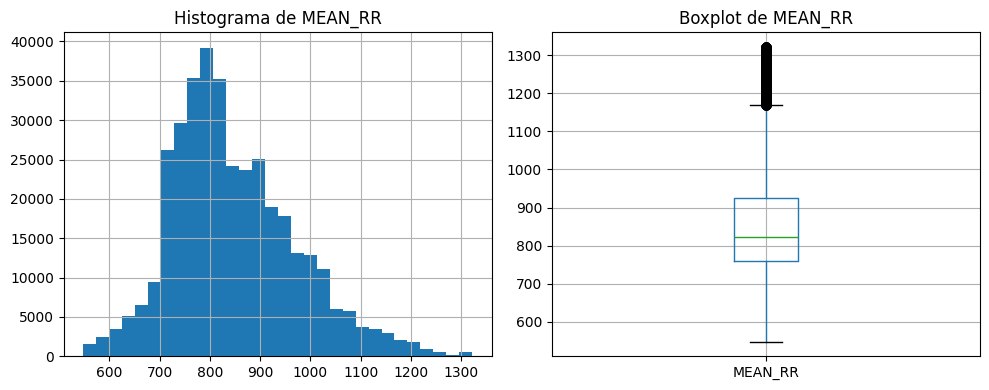



Coluna MEDIAN_RR:


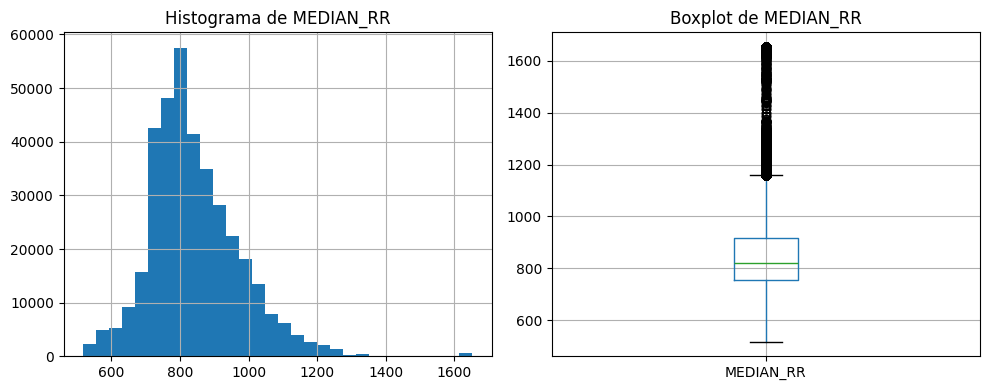



Coluna SDRR:


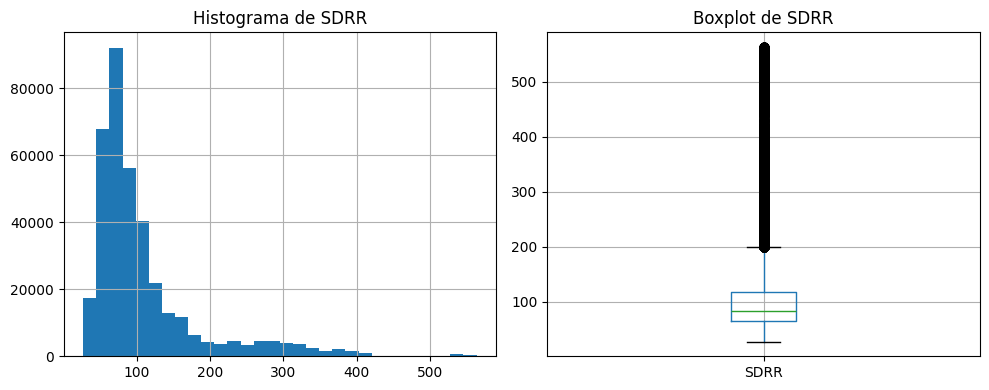



Coluna RMSSD:


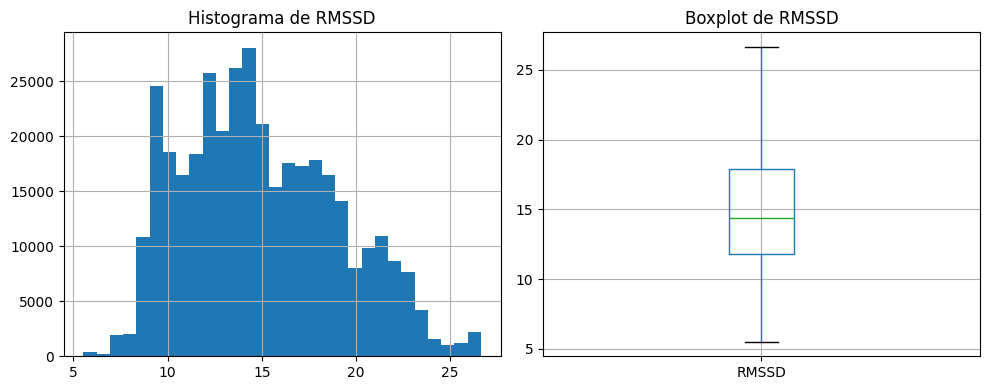



Coluna SDSD:


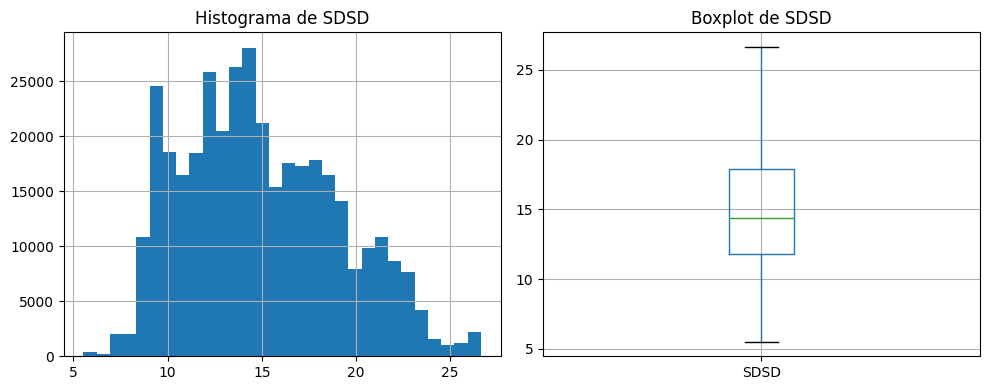



Coluna SDRR_RMSSD:


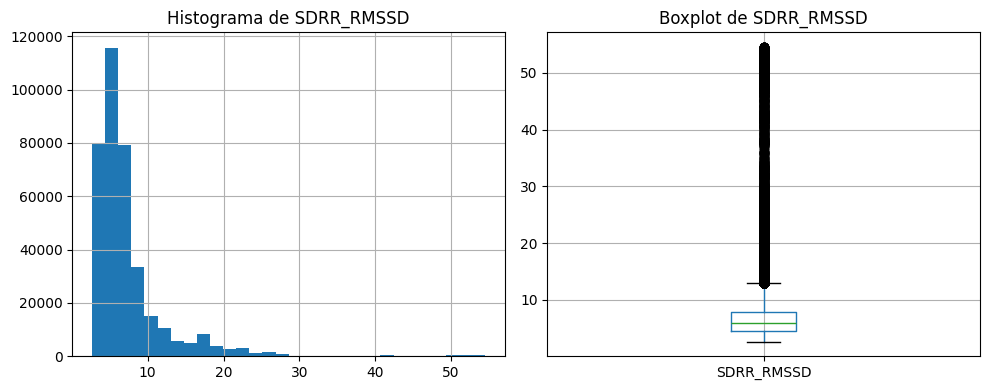



Coluna HR:


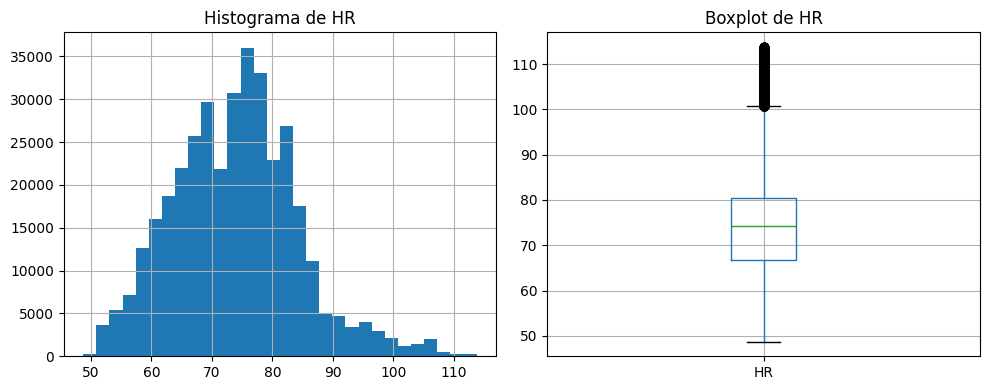



Coluna pNN25:


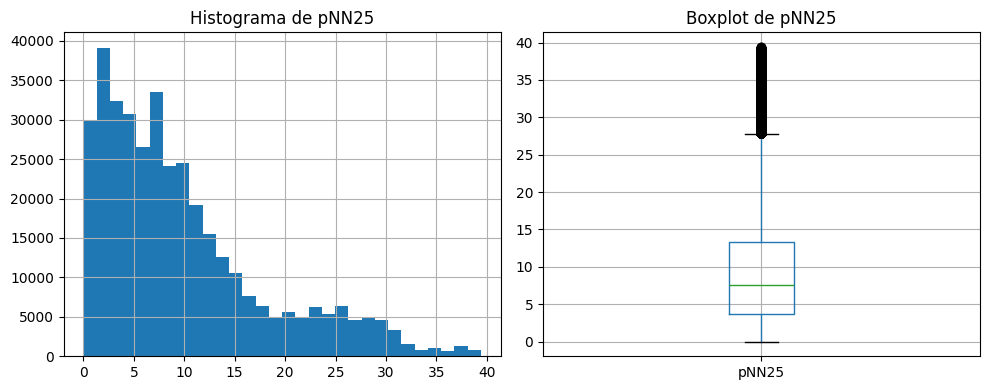



Coluna pNN50:


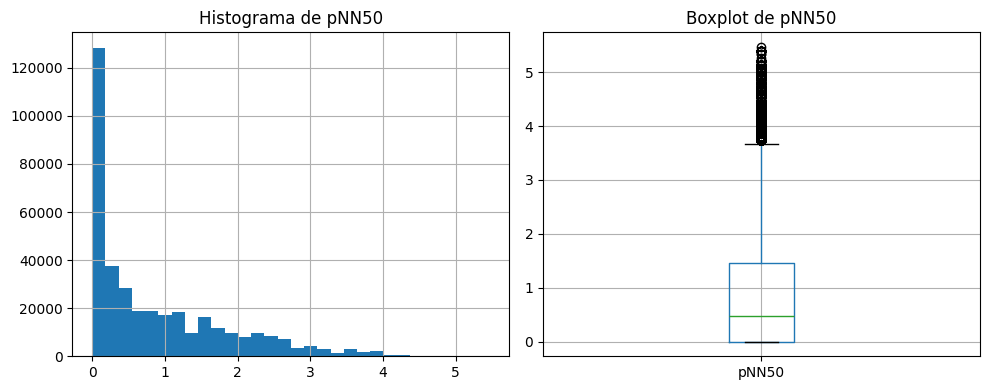



Coluna KURT:


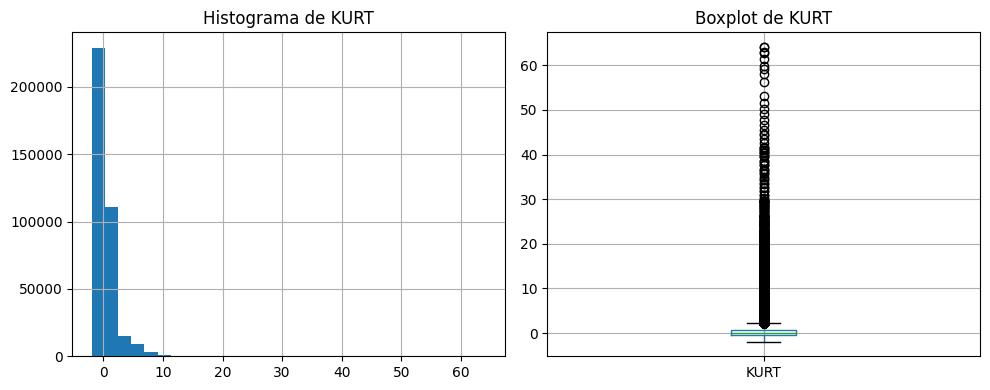



Coluna SKEW:


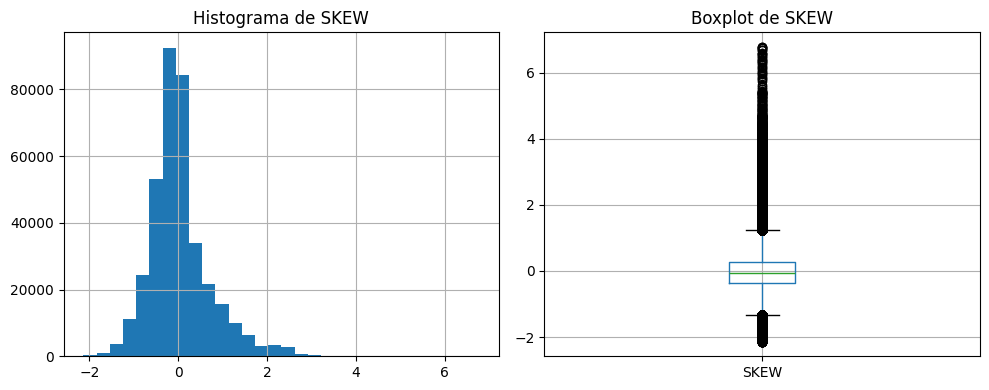



Coluna MEAN_REL_RR:


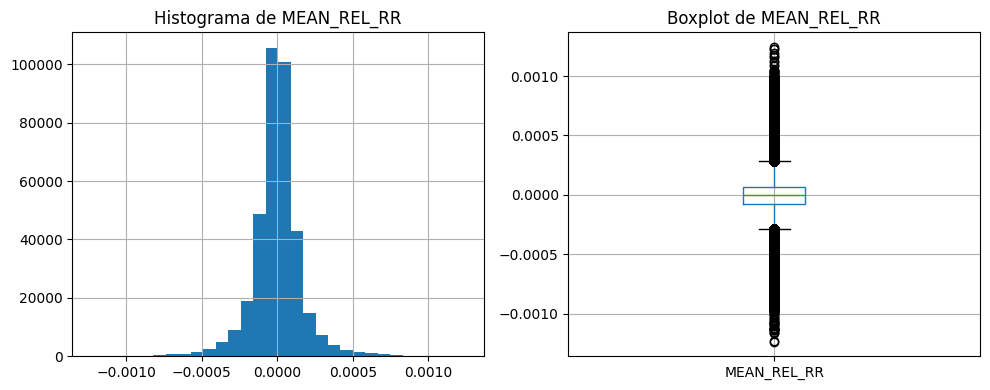



Coluna MEDIAN_REL_RR:


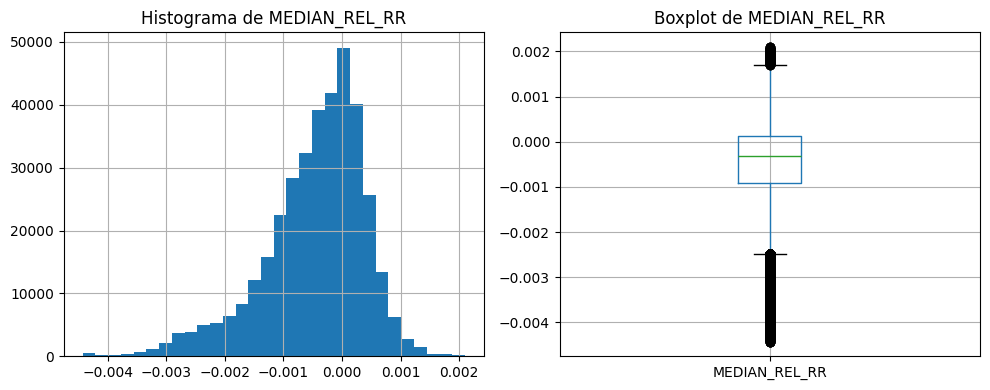



Coluna SDRR_REL_RR:


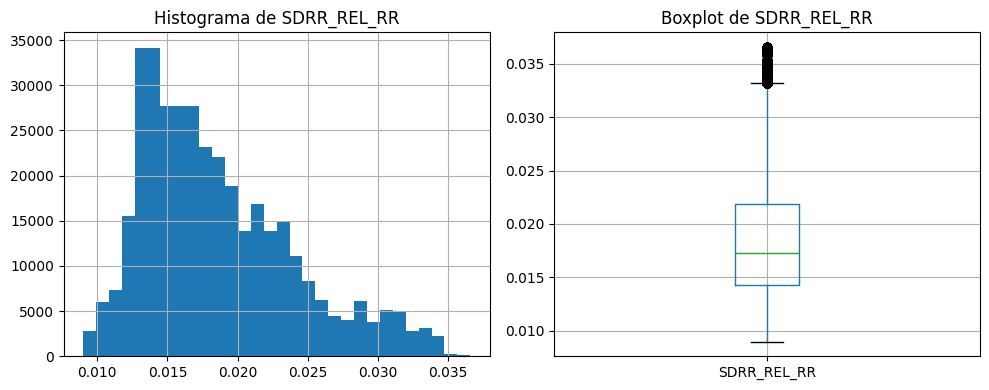



Coluna RMSSD_REL_RR:


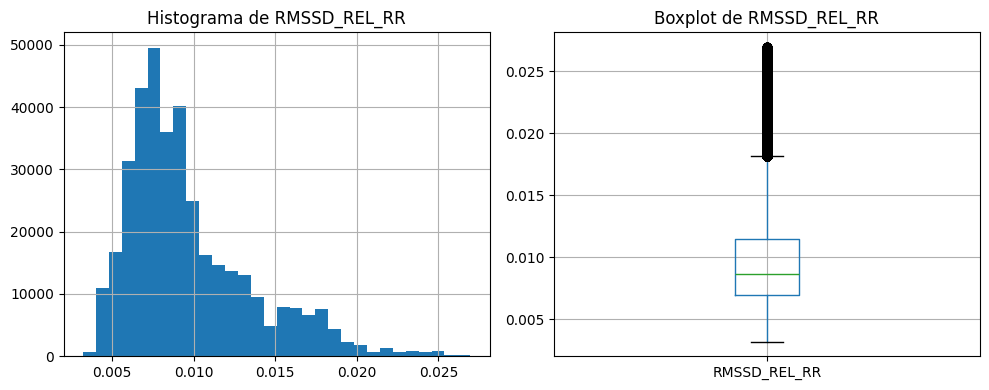



Coluna SDSD_REL_RR:


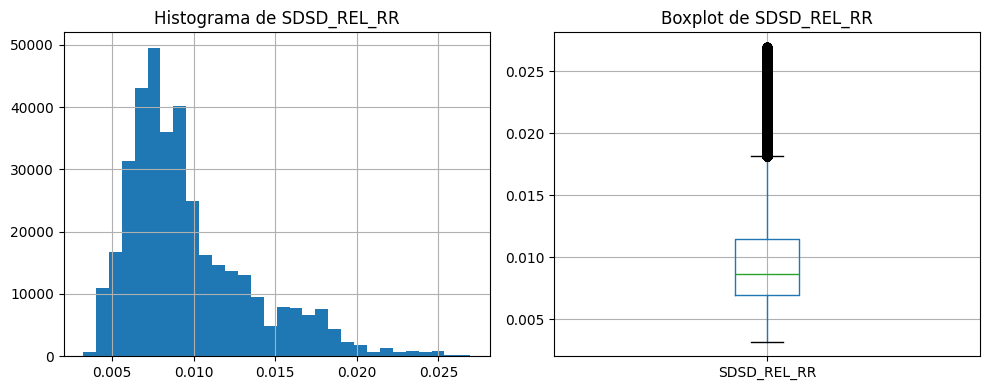



Coluna SDRR_RMSSD_REL_RR:


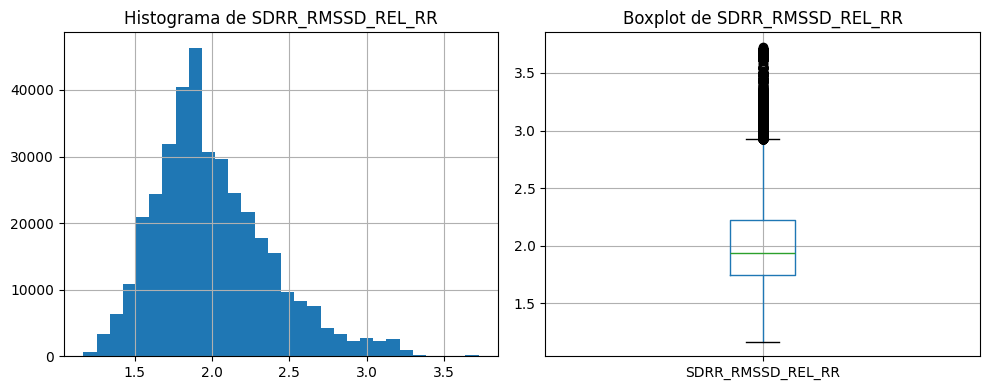



Coluna KURT_REL_RR:


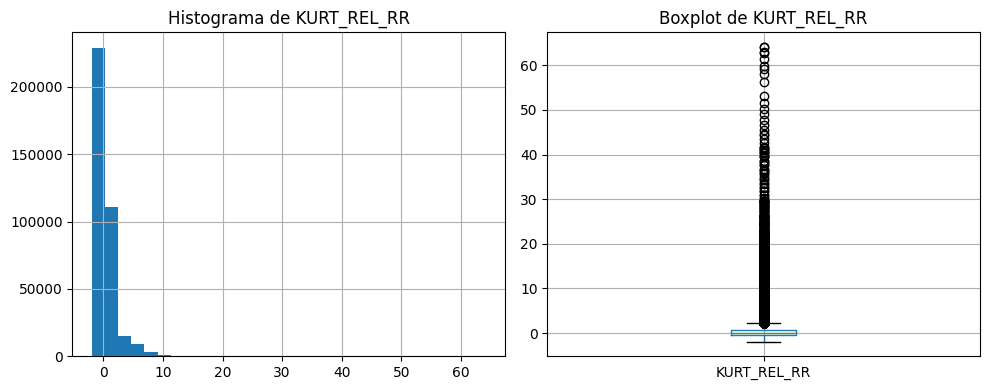



Coluna SKEW_REL_RR:


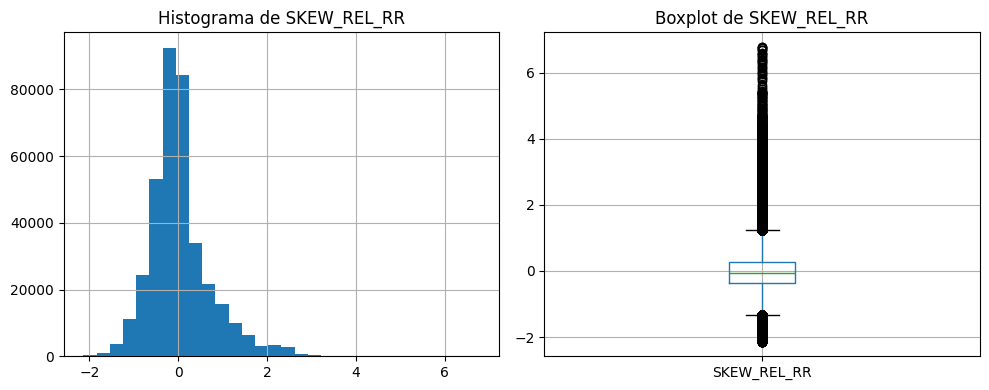



Coluna VLF:


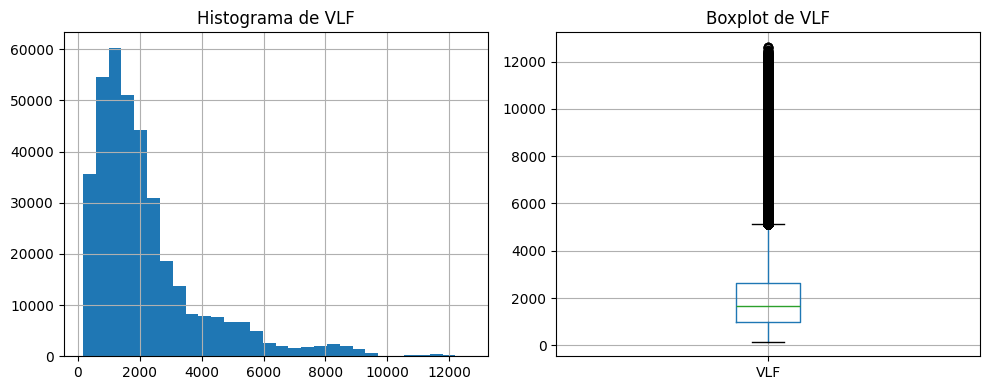



Coluna VLF_PCT:


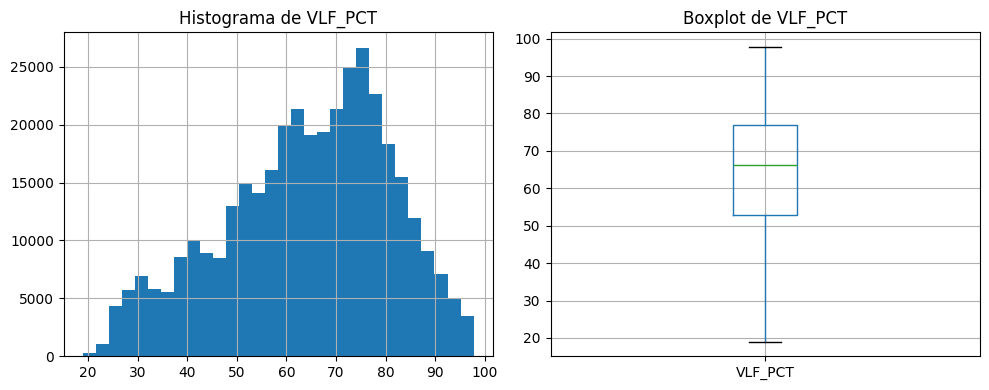



Coluna LF:


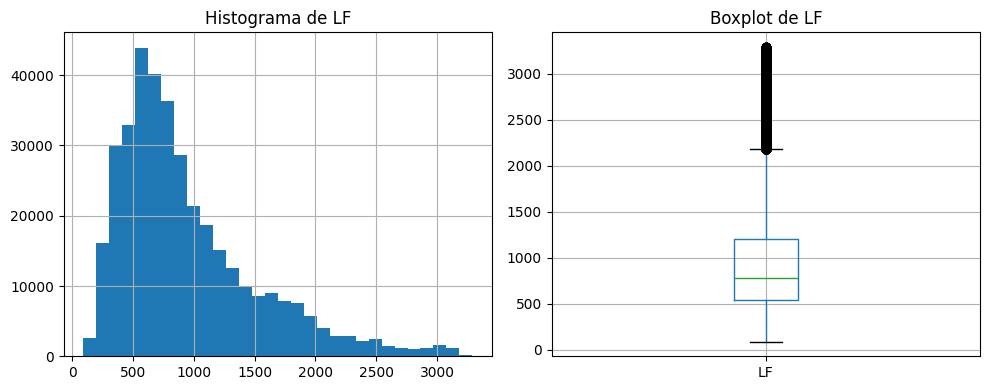



Coluna LF_PCT:


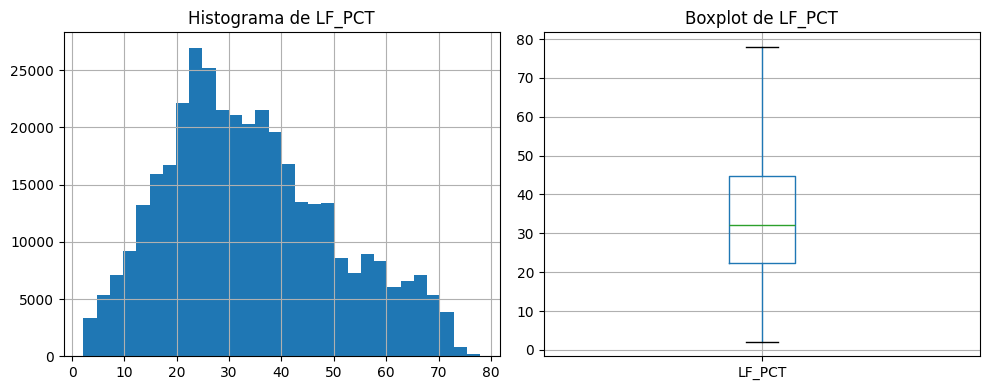



Coluna LF_NU:


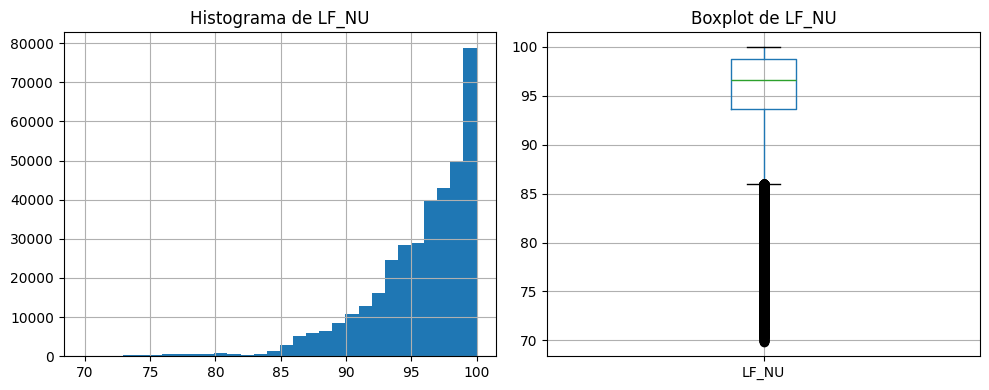



Coluna HF:


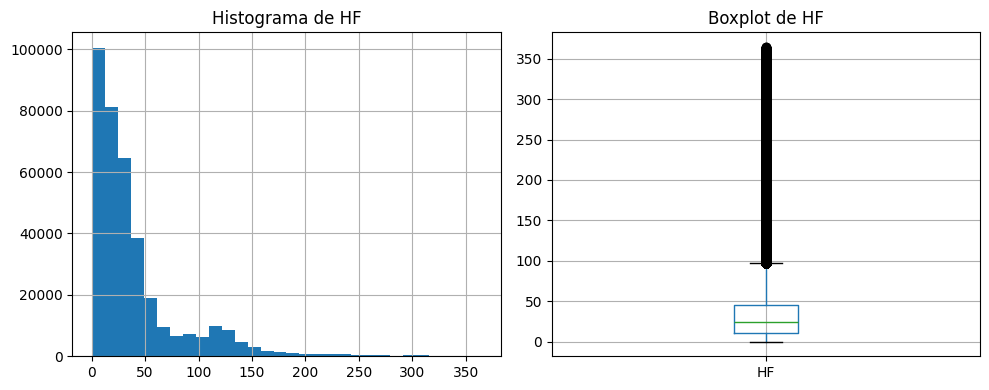



Coluna HF_PCT:


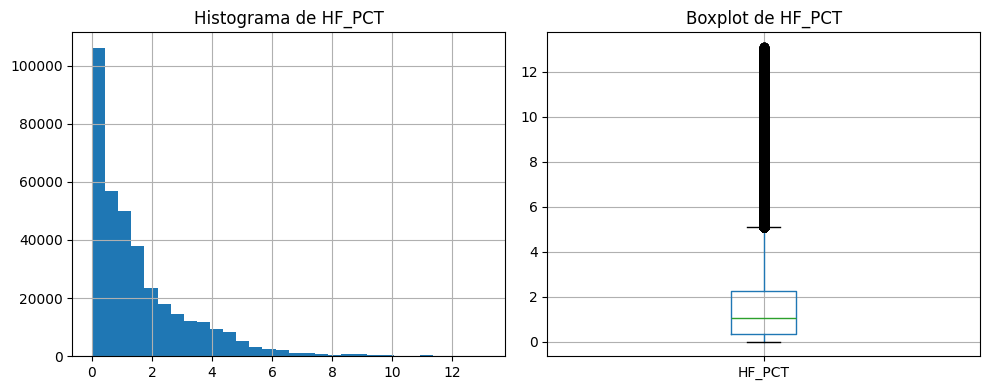



Coluna HF_NU:


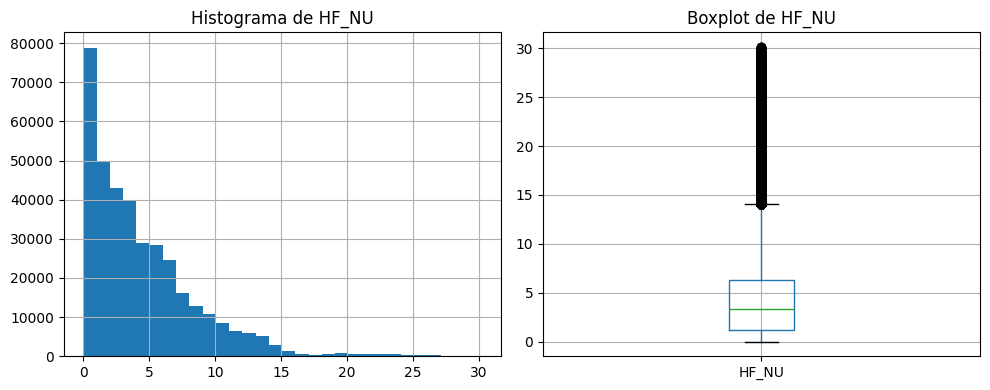



Coluna TP:


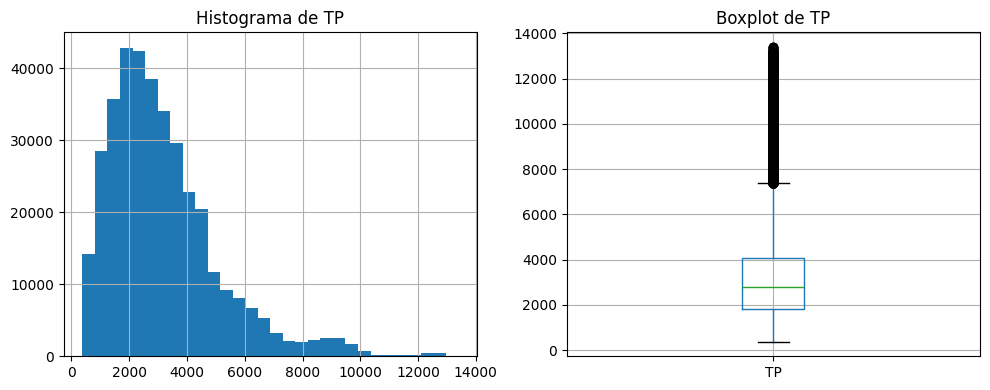



Coluna LF_HF:


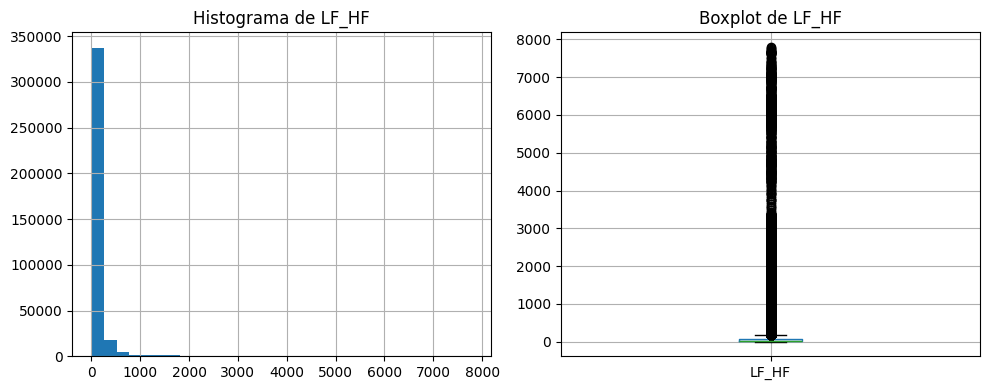



Coluna HF_LF:


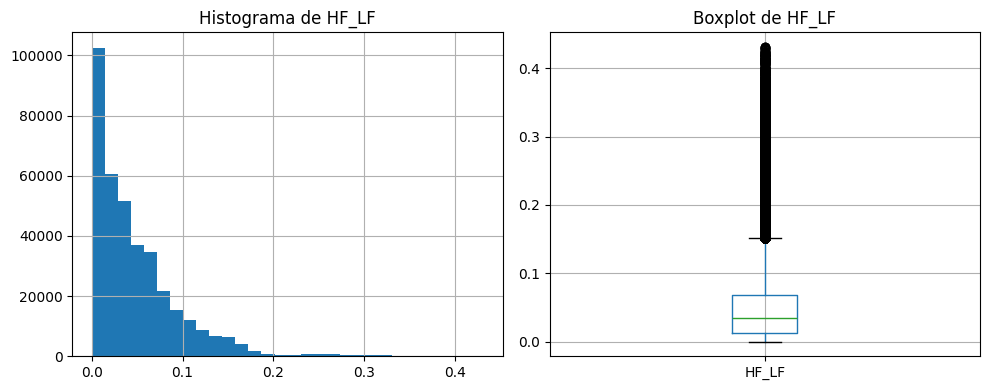



Coluna SD1:


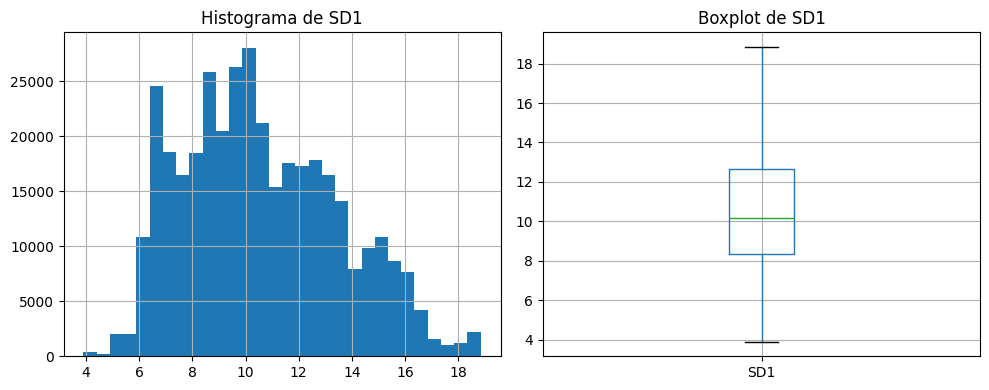



Coluna SD2:


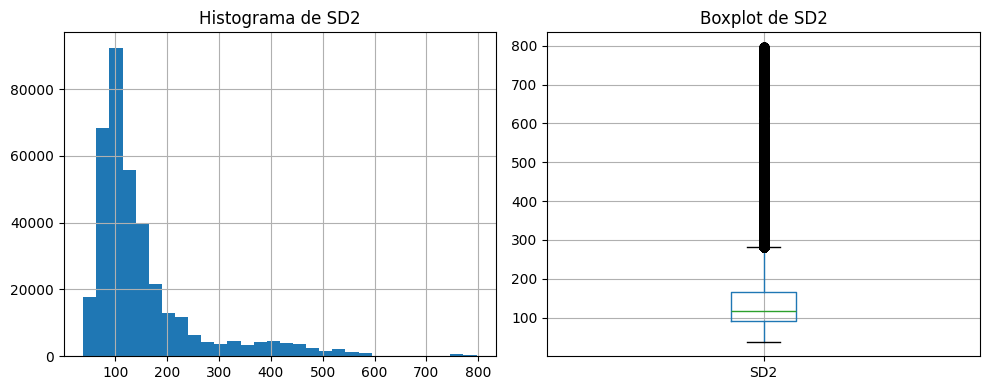



Coluna sampen:


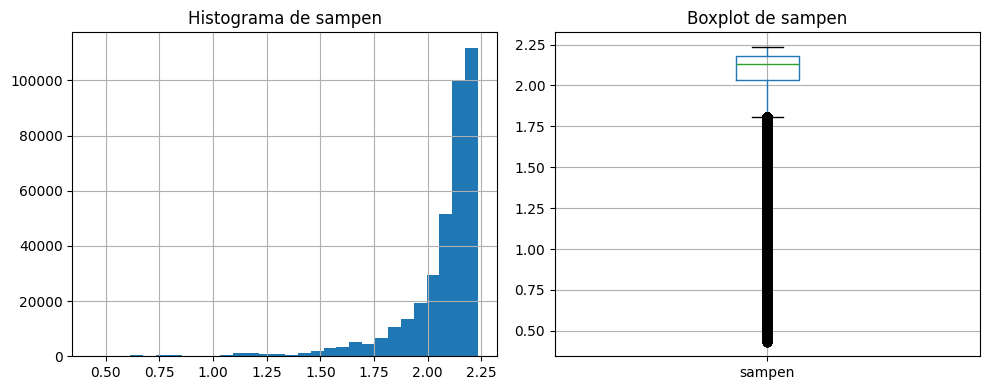



Coluna higuci:


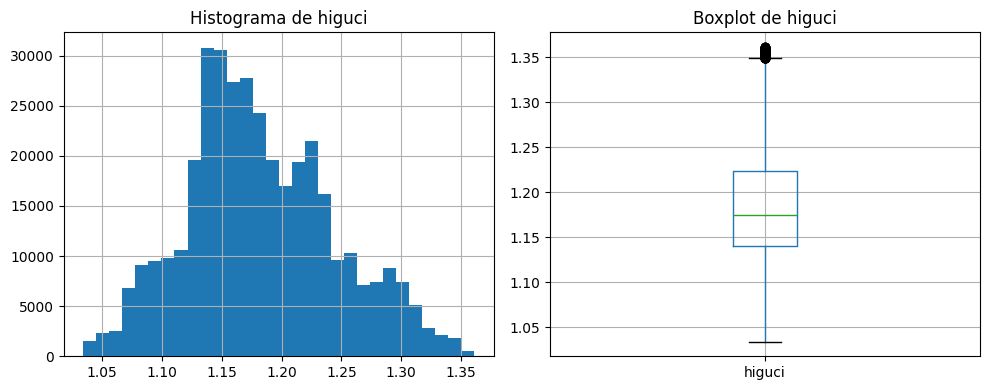



Coluna datasetId:


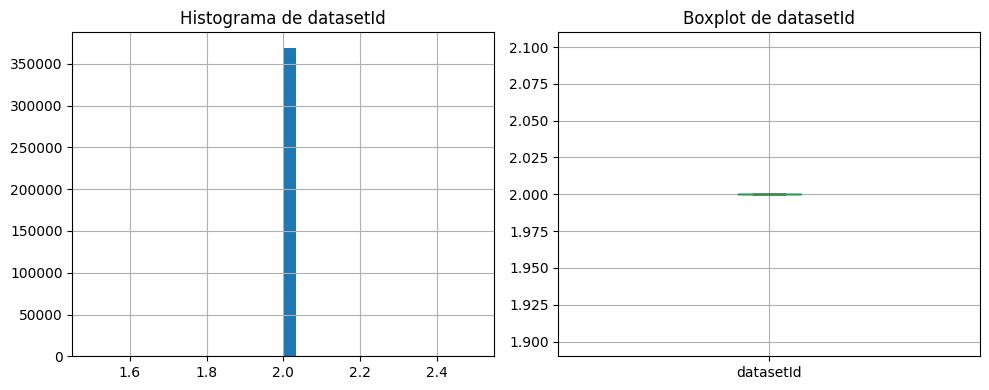

In [ ]:
for i in num_cols:
    
    print(f"Coluna {i}:")

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    df[i].hist(bins=30)
    plt.title(f'Histograma de {i}')

    plt.subplot(1,2,2)
    df.boxplot(column=i)
    plt.title(f'Boxplot de {i}')

    plt.tight_layout()
    plt.show()

    print("\n")

### Perform a class-conditional mono-variate analysis of each of the predictors. Again, you must plot their (class-conditional) histograms and box-plots, calculate their (class-conditional) mean $\mu_{d|l},$ standard deviation $\sigma_{d|l}$ and skewness $\gamma_{d|l},$ with $d = 1, \ldots, D,$ now using only the $N_l$ observations of class $l$, for each the $L$ classes.


In [ ]:
# tabela com atributo | condição | média | desvio padrão | skewness
tabelas = {}
for cond, grupo in df.groupby('condition'):
    tabelas[cond] = grupo[num_cols].agg(['mean','std','skew']).T



In [ ]:
tabelas["no stress"]

mean          std      skew
MEAN_RR            8.129298e+02   109.994953  0.841535
MEDIAN_RR          8.072643e+02   121.965645  1.661866
SDRR               1.039568e+02    78.138081  2.837352
RMSSD              1.417542e+01     3.826056  0.473854
SDSD               1.417463e+01     3.826132  0.473932
SDRR_RMSSD         7.491690e+00     5.798792  4.109650
HR                 7.674904e+01     9.725866  0.265812
pNN25              8.172970e+00     7.058905  1.388203
pNN50              7.423533e-01     0.886740  1.282604
KURT               7.814898e-01     2.181591  5.264982
SKEW               1.086792e-01     0.795562  1.143264
MEAN_REL_RR        5.299303e-07     0.000166  0.074265
MEDIAN_REL_RR     -4.699608e-04     0.000941 -1.140346
SDRR_REL_RR        1.831076e-02     0.005482  0.832015
RMSSD_REL_RR       9.833757e-03     0.004042  1.243248
SDSD_REL_RR        9.833741e-03     0.004042  1.243249
SDRR_RMSSD_REL_RR  1.952621e+00     0.353066  0.699093
KURT_REL_RR        7.814898e-01     2.181591  5.264982
SKEW_REL_RR        1.086792e-01     0.795562  1.143264
VLF                1.927212e+03  1436.072619  1.846618
VLF_PCT            6.385264e+01    16.336092 -0.424531
LF                 8.715590e+02   504.568186  1.220664
LF_PCT             3.427110e+01    15.559790  0.456076
LF_NU              9.485734e+01     4.302544 -1.454775
HF                 4.352038e+01    47.685591  2.480371
HF_PCT             1.876265e+00     1.876858  1.901642
HF_NU              5.142659e+00     4.302544  1.454775
TP                 2.842291e+03  1583.568506  1.375289
LF_HF              6.163258e+01   118.015368  4.766995
HF_LF              5.655757e-02     0.051836  1.904550
SD1                1.002632e+01     2.706387  0.473932
SD2                1.465703e+02   110.609448  2.836190
sampen             2.029312e+00     0.250486 -2.702469
higuci             1.185612e+00     0.059157  0.425701
datasetId          2.000000e+00     0.000000  0.000000

In [ ]:
tabelas["interruption"]

mean          std      skew
MEAN_RR            8.615610e+02   120.312234  0.687755
MEDIAN_RR          8.572065e+02   122.472335  0.590625
SDRR               1.064779e+02    72.237341  2.153444
RMSSD              1.636431e+01     4.708047  0.183469
SDSD               1.636373e+01     4.708022  0.183675
SDRR_RMSSD         6.642876e+00     4.244720  2.376403
HR                 7.236381e+01     9.557339  0.322759
pNN25              1.321426e+01    10.303719  0.676873
pNN50              1.038080e+00     1.114112  1.109714
KURT               6.917242e-02     0.719733  1.437704
SKEW              -6.545293e-02     0.488235  0.630651
MEAN_REL_RR       -3.566381e-07     0.000153  0.254045
MEDIAN_REL_RR     -5.724174e-04     0.000782 -0.621721
SDRR_REL_RR        1.979551e-02     0.005888  0.757671
RMSSD_REL_RR       1.026965e-02     0.003956  1.176845
SDSD_REL_RR        1.026963e-02     0.003956  1.176845
SDRR_RMSSD_REL_RR  2.003142e+00     0.349167  0.929732
KURT_REL_RR        6.917242e-02     0.719733  1.437704
SKEW_REL_RR       -6.545293e-02     0.488235  0.630651
VLF                2.206573e+03  2044.915678  2.351228
VLF_PCT            6.057276e+01    17.280177 -0.212185
LF                 1.154907e+03   722.635994  0.968746
LF_PCT             3.786831e+01    16.654894  0.182226
LF_NU              9.591815e+01     4.119905 -1.875960
HF                 4.060773e+01    46.511955  2.083434
HF_PCT             1.558933e+00     1.741785  1.985212
HF_NU              4.081853e+00     4.119905  1.875960
TP                 3.402088e+03  2150.287703  1.665696
LF_HF              1.385683e+02   298.075749  4.012043
HF_LF              4.467111e-02     0.049494  2.529542
SD1                1.157477e+01     3.330185  0.183675
SD2                1.500161e+02   102.282134  2.155068
sampen             2.113072e+00     0.125695 -2.216320
higuci             1.190632e+00     0.064337  0.340316
datasetId          2.000000e+00     0.000000  0.000000

In [ ]:
tabelas["time pressure"]

mean          std      skew
MEAN_RR             927.499113   132.302495 -0.058945
MEDIAN_RR           925.338514   136.966403 -0.106196
SDRR                130.924775    77.964958  1.411452
RMSSD                15.206321     3.250600 -0.132265
SDSD                 15.205528     3.250250 -0.132216
SDRR_RMSSD            8.336810     4.010670  1.541410
HR                   67.763790    10.188172  1.621055
pNN25                 9.514684     5.462191  0.452069
pNN50                 0.969747     1.025575  1.197133
KURT                  0.461924     1.487374  2.380049
SKEW                  0.007967     0.647145  0.982604
MEAN_REL_RR          -0.000011     0.000170  0.070286
MEDIAN_REL_RR        -0.000274     0.000718 -0.145099
SDRR_REL_RR           0.017371     0.004080  0.798885
RMSSD_REL_RR          0.008356     0.002904  1.043544
SDSD_REL_RR           0.008356     0.002904  1.043544
SDRR_RMSSD_REL_RR     2.182134     0.430047  0.741238
KURT_REL_RR           0.461924     1.487374  2.380049
SKEW_REL_RR           0.007967     0.647145  0.982604
VLF                3038.842291  2183.006484  0.978472
VLF_PCT              71.753604    14.817083 -0.704850
LF                  838.651129   384.317062  1.072087
LF_PCT               27.352099    14.240940  0.739303
LF_NU                97.205583     2.805935 -1.639757
HF                   23.657391    30.417040  3.302415
HF_PCT                0.894297     1.076518  1.797540
HF_NU                 2.794417     2.805935  1.639757
TP                 3901.150811  2223.512284  0.689030
LF_HF               248.639179   730.544500  5.729301
HF_LF                 0.029650     0.031315  1.895932
SD1                  10.755520     2.299041 -0.132216
SD2                 184.778013   110.343928  1.411293
sampen                2.082985     0.130583 -1.690559
higuci                1.158234     0.062014  0.218580
datasetId             2.000000     0.000000  0.000000


=== Condicao: no stress ===
Coluna MEAN_RR:


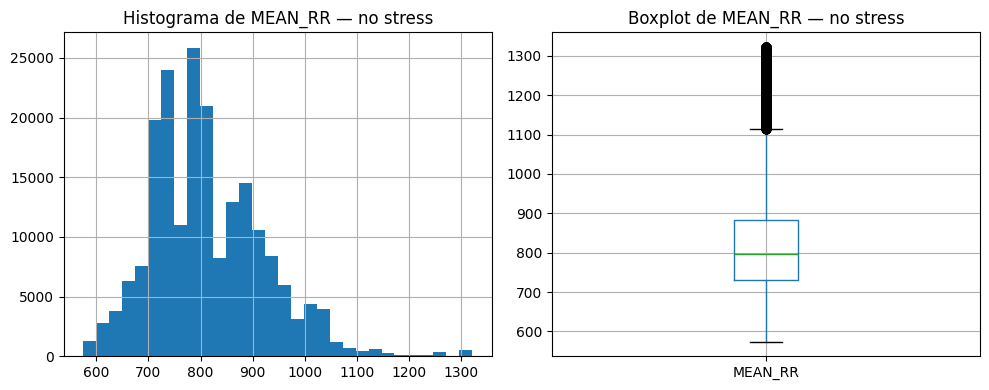

Coluna MEDIAN_RR:


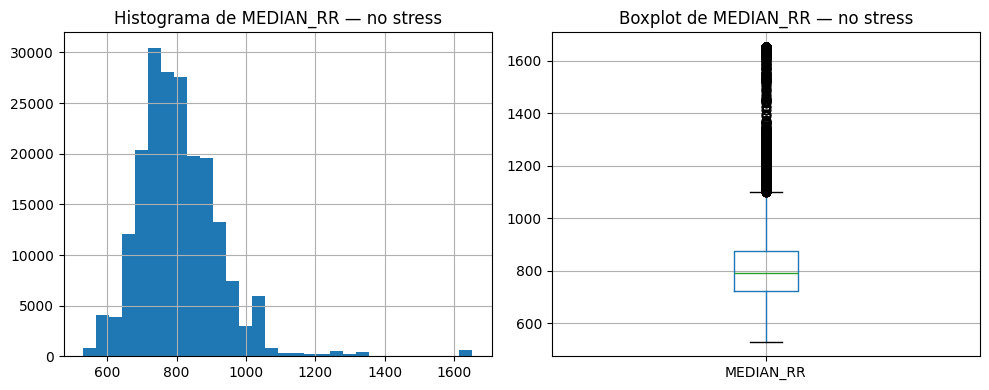

Coluna SDRR:


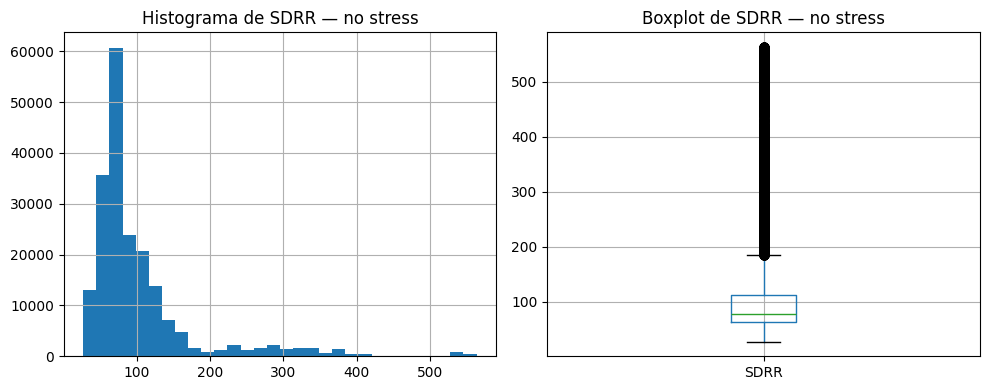

Coluna RMSSD:


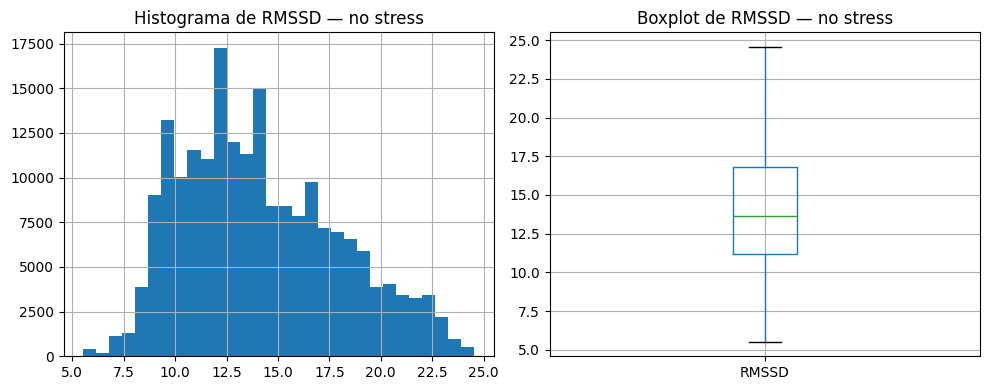

Coluna SDSD:


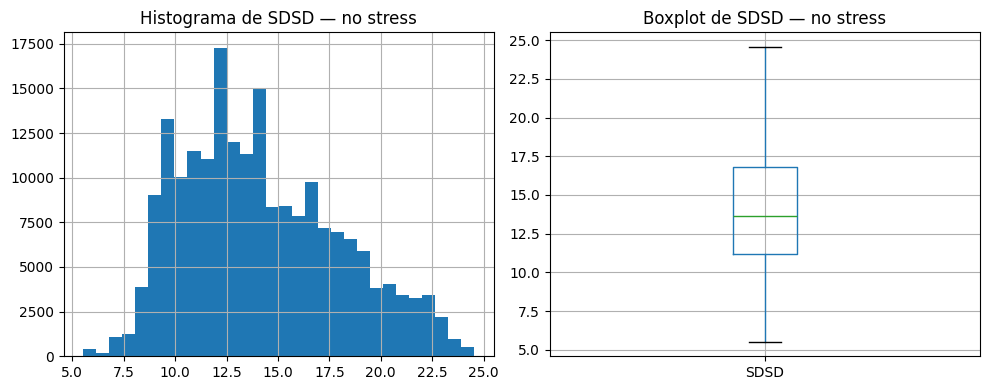

Coluna SDRR_RMSSD:


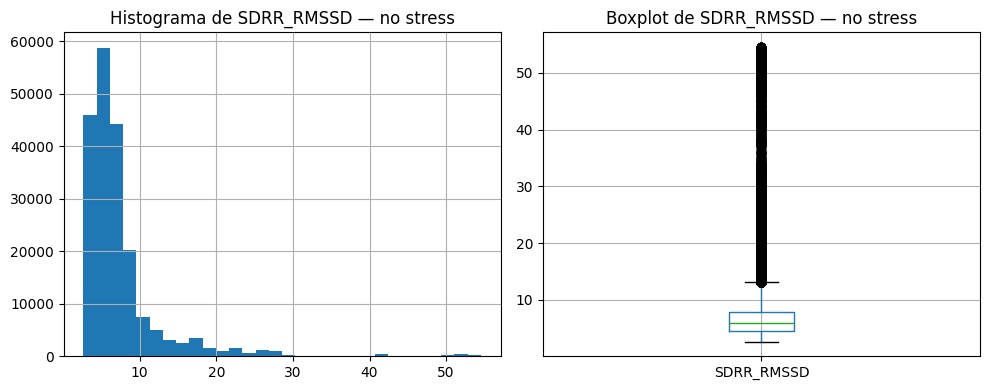

Coluna HR:


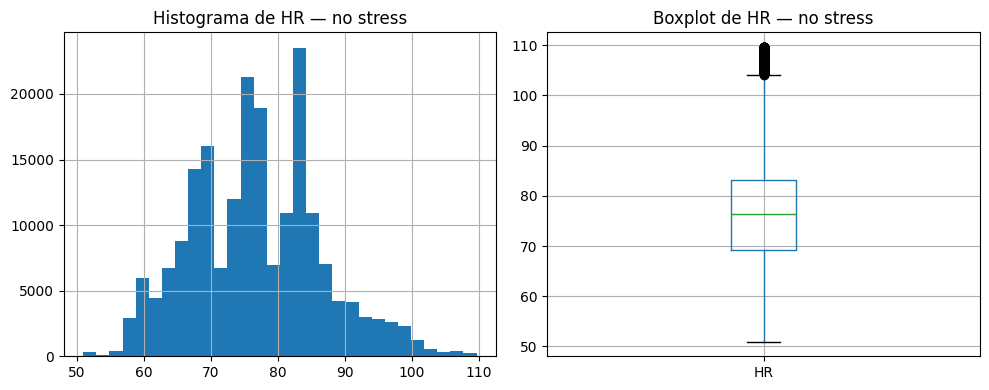

Coluna pNN25:


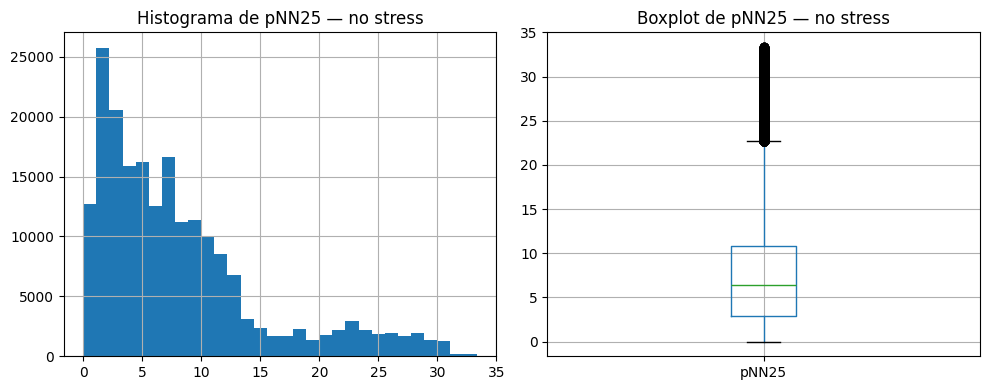

Coluna pNN50:


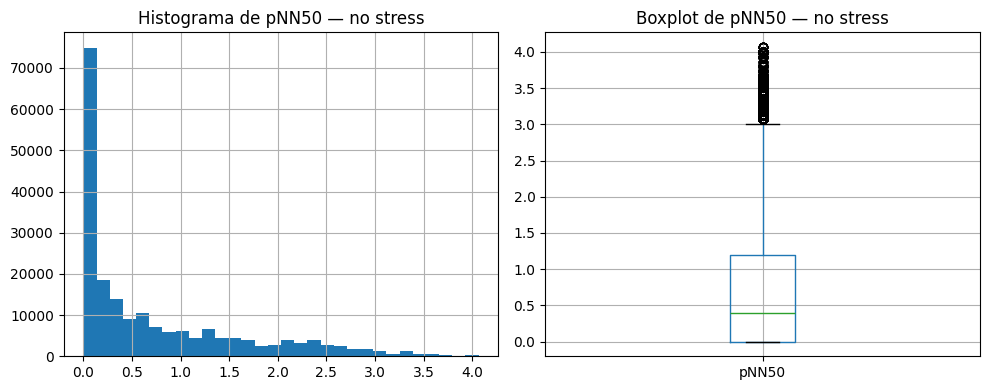

Coluna KURT:


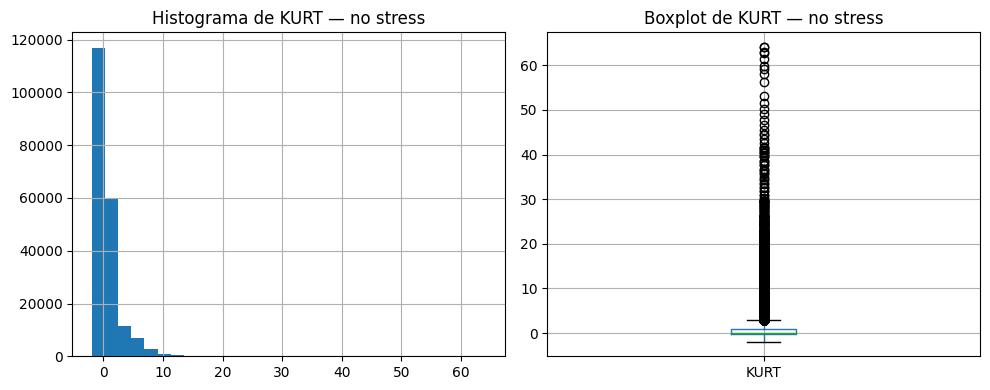

Coluna SKEW:


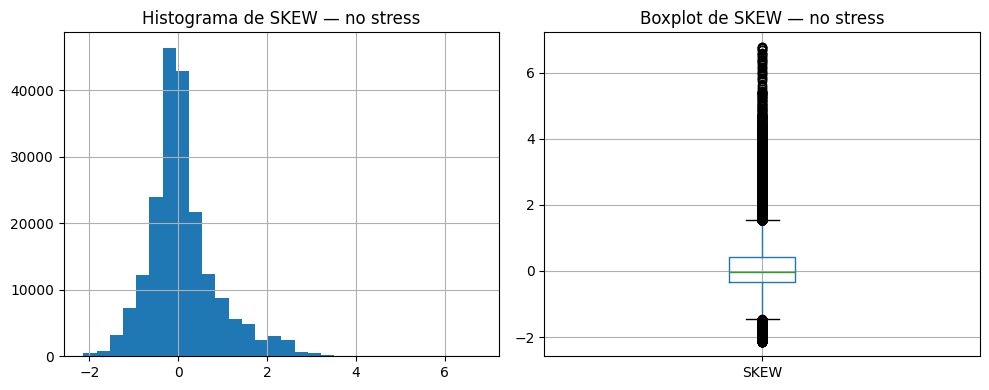

Coluna MEAN_REL_RR:


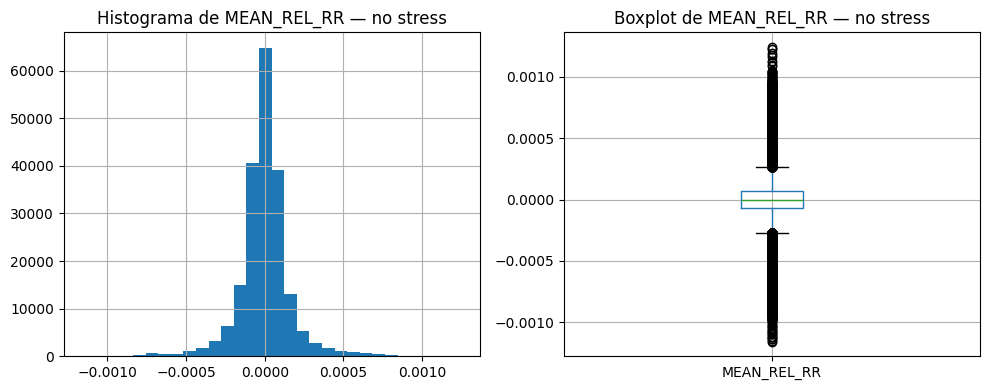

Coluna MEDIAN_REL_RR:


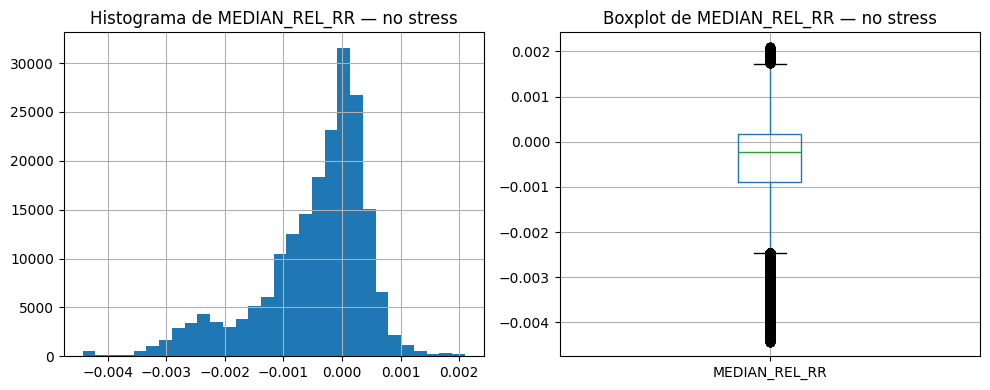

Coluna SDRR_REL_RR:


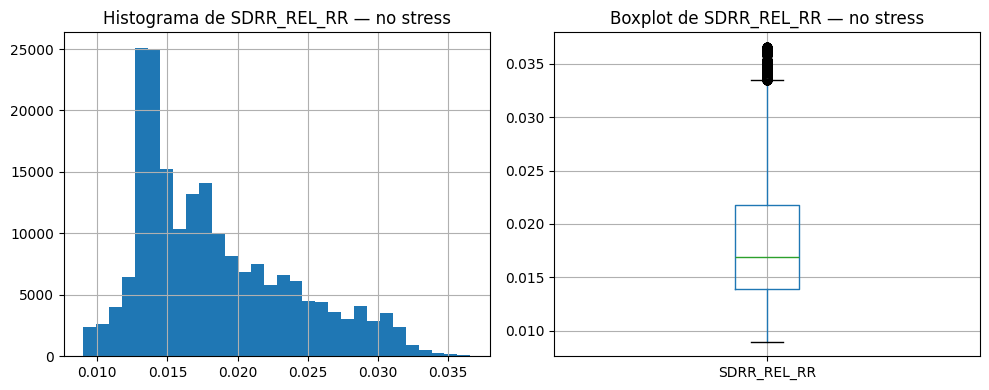

Coluna RMSSD_REL_RR:


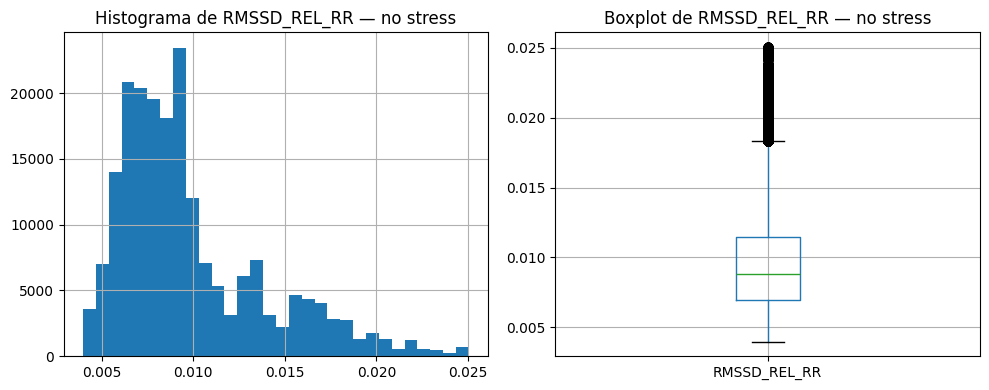

Coluna SDSD_REL_RR:


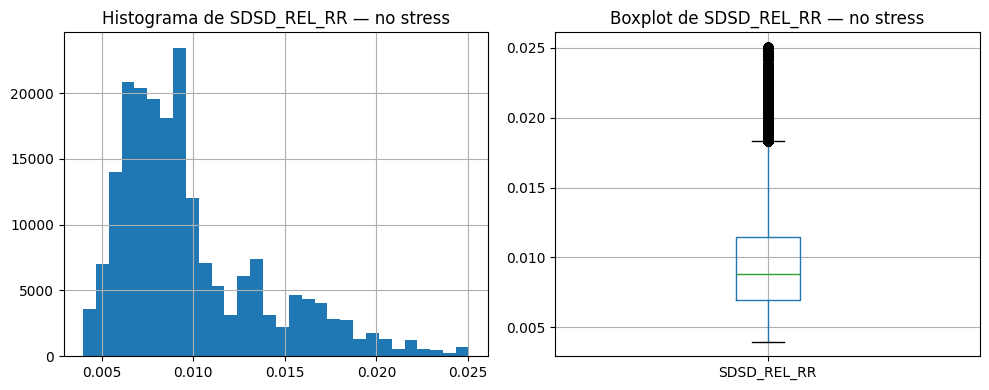

Coluna SDRR_RMSSD_REL_RR:


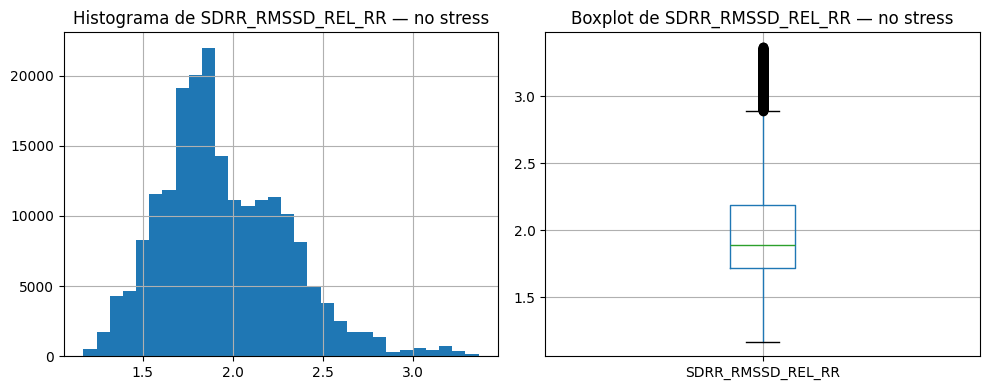

Coluna KURT_REL_RR:


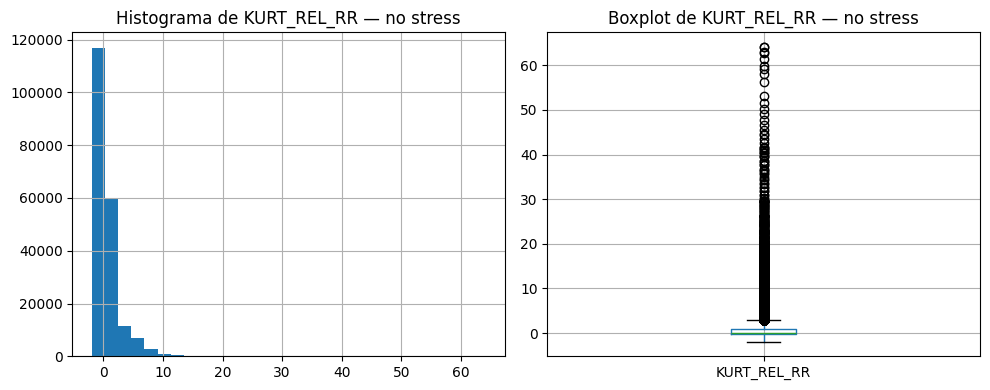

Coluna SKEW_REL_RR:


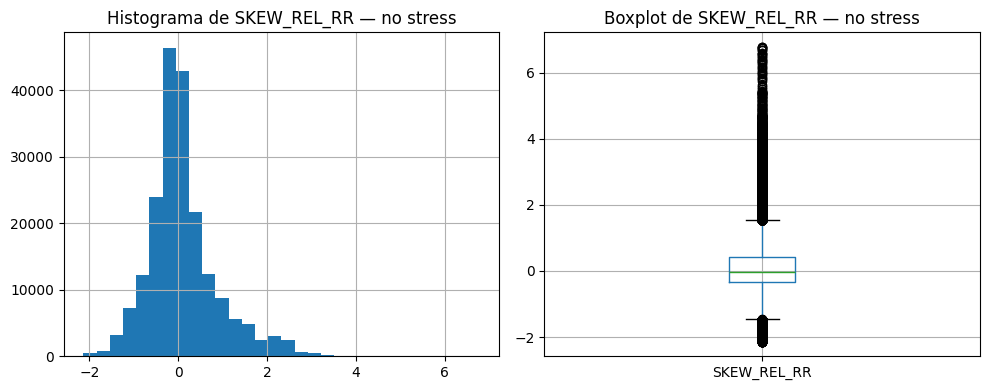

Coluna VLF:


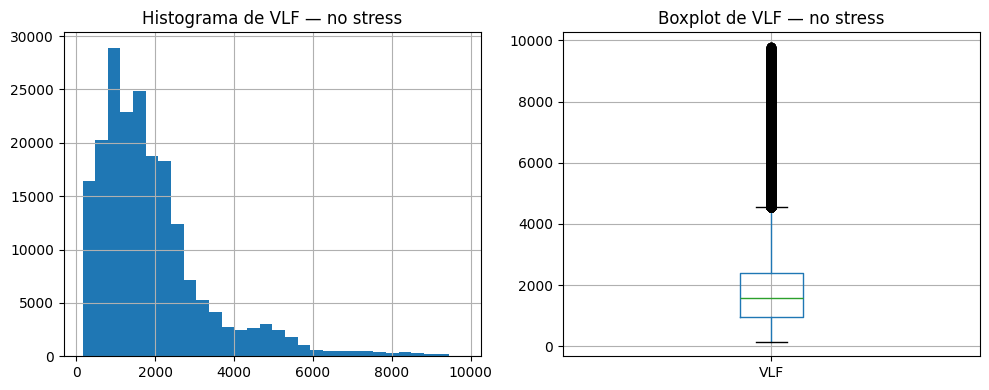

Coluna VLF_PCT:


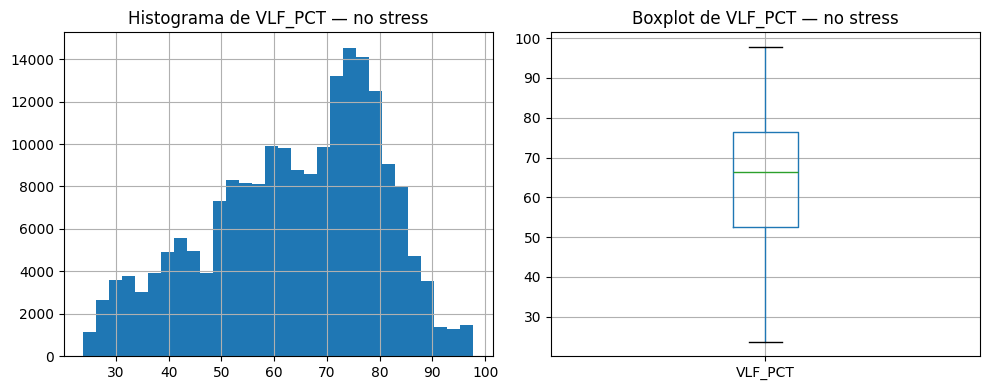

Coluna LF:


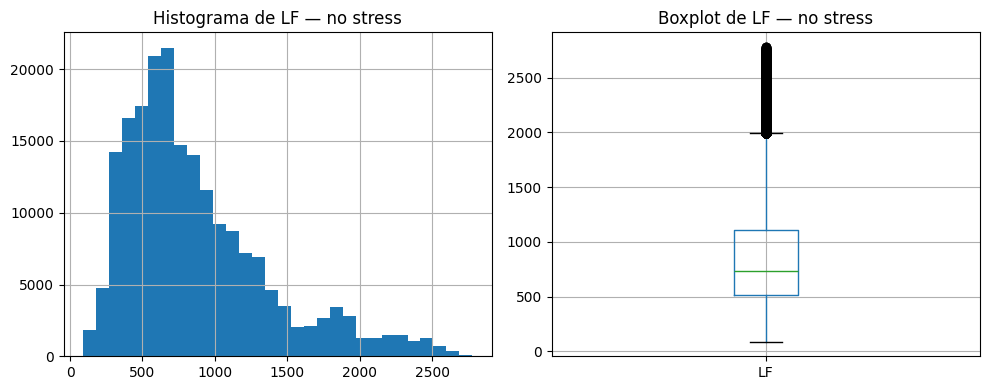

Coluna LF_PCT:


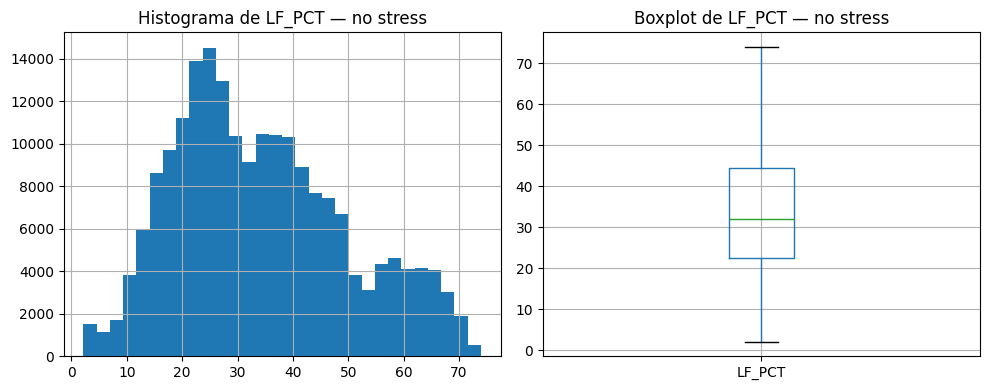

Coluna LF_NU:


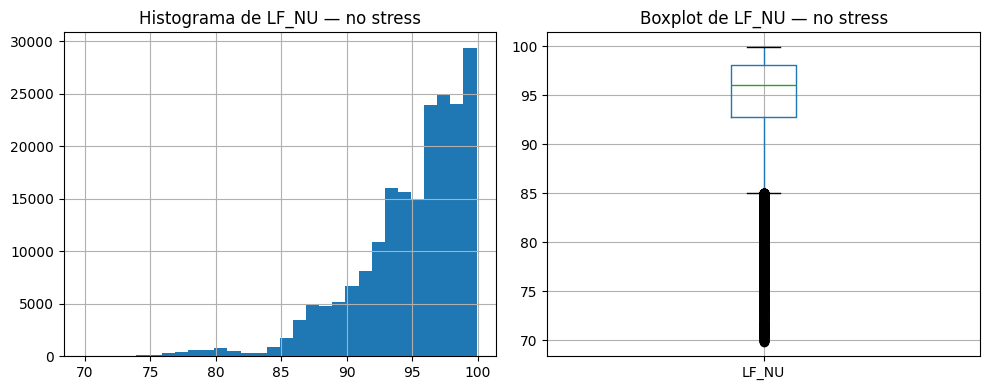

Coluna HF:


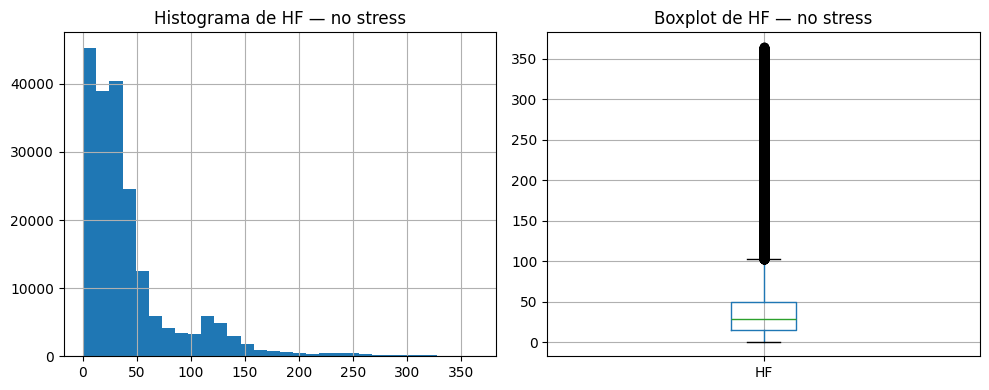

Coluna HF_PCT:


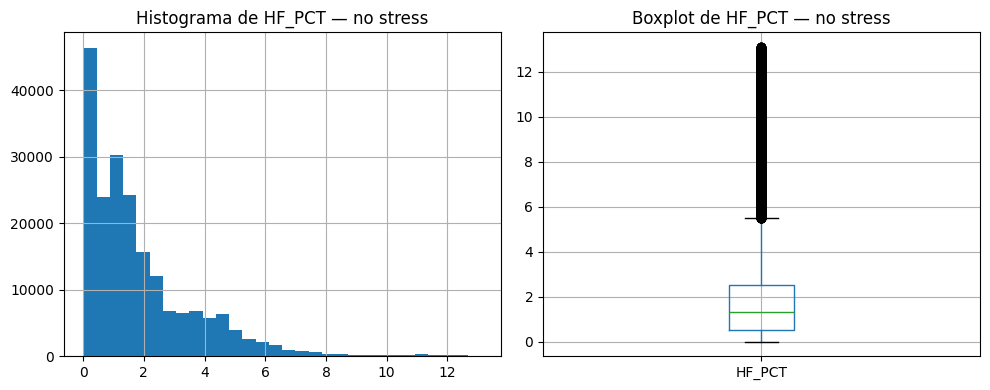

Coluna HF_NU:


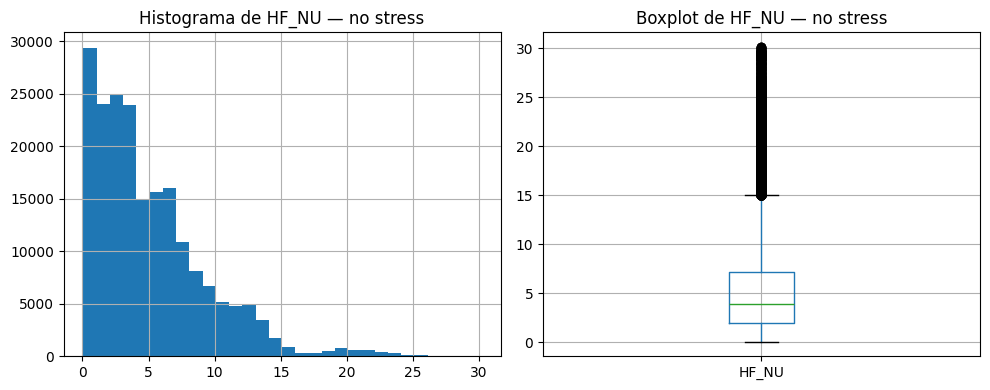

Coluna TP:


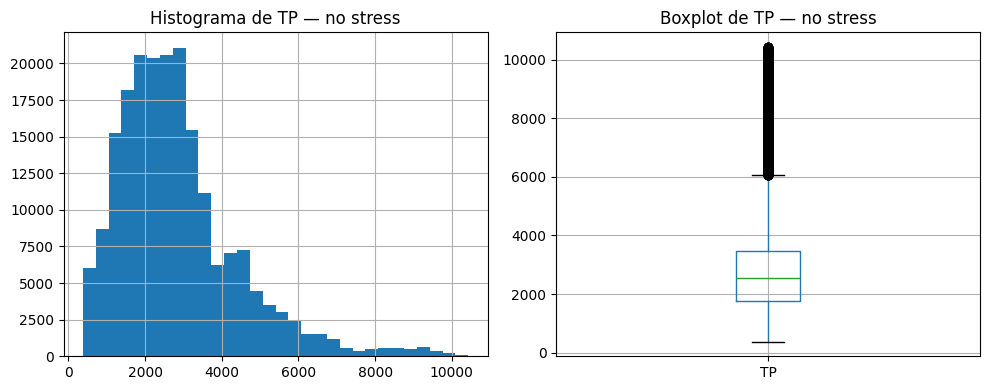

Coluna LF_HF:


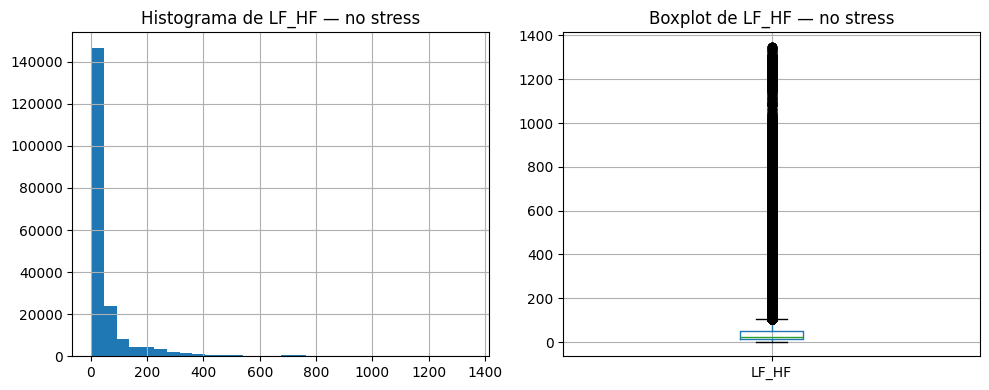

Coluna HF_LF:


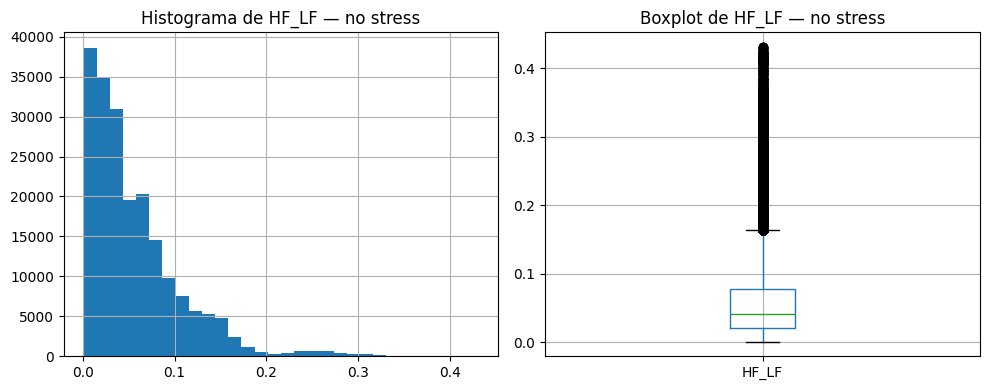

Coluna SD1:


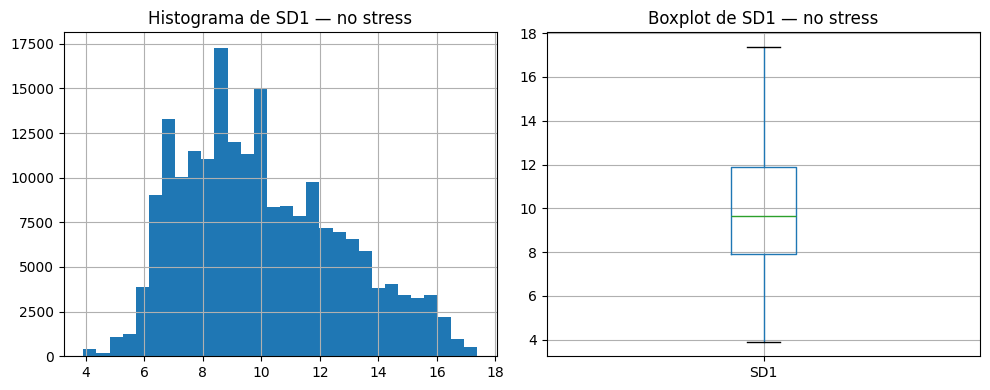

Coluna SD2:


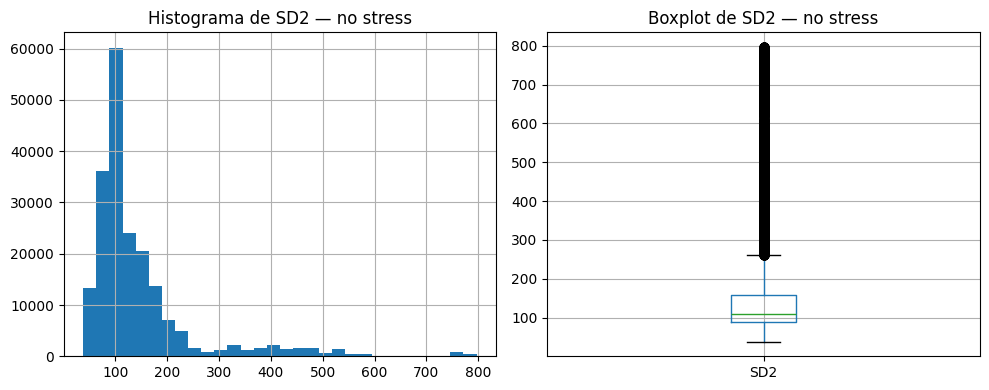

Coluna sampen:


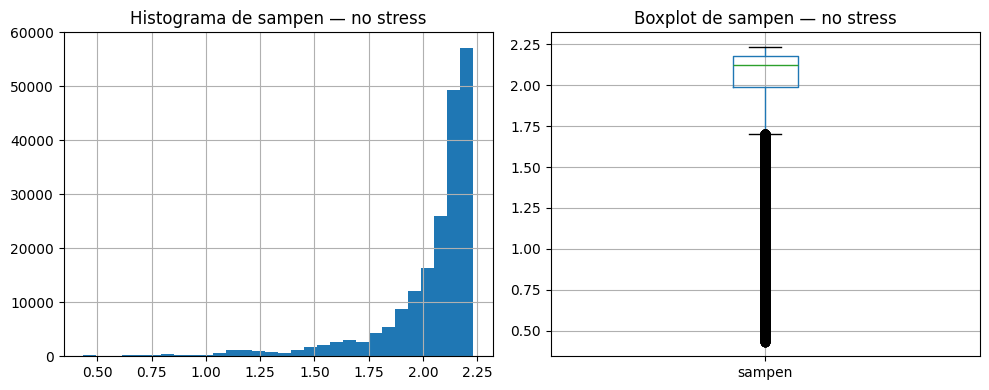

Coluna higuci:


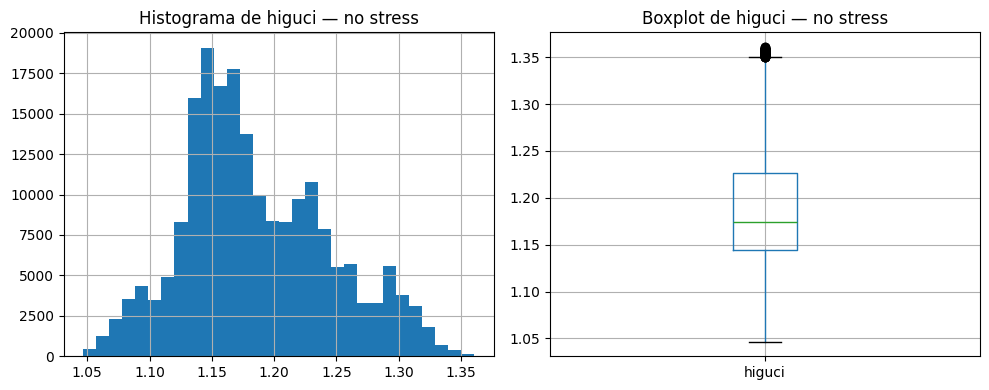

Coluna datasetId:


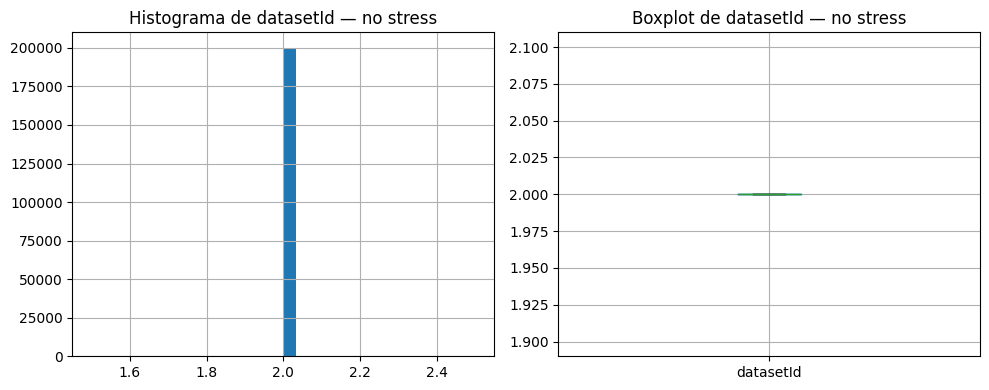


=== Condicao: interruption ===
Coluna MEAN_RR:


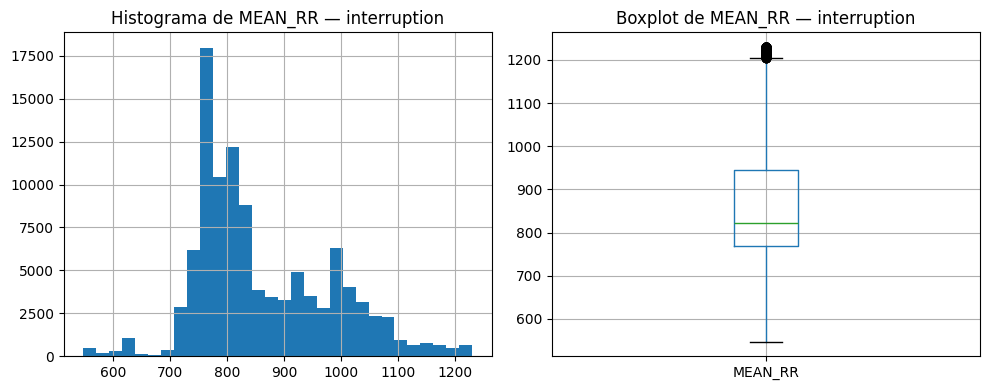

Coluna MEDIAN_RR:


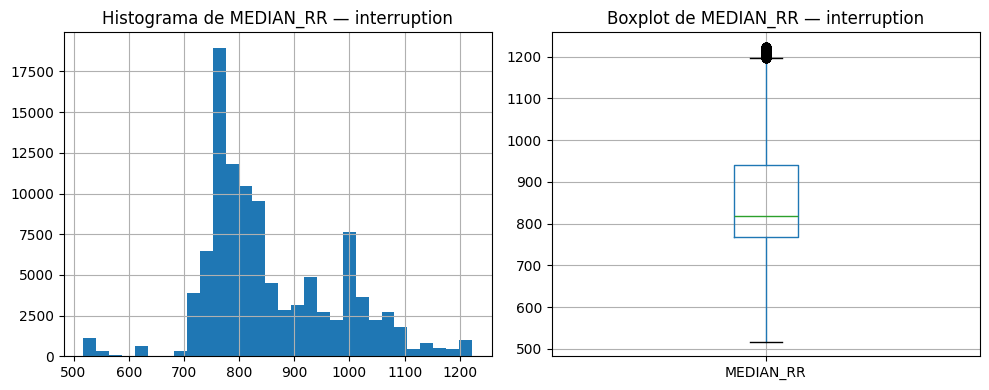

Coluna SDRR:


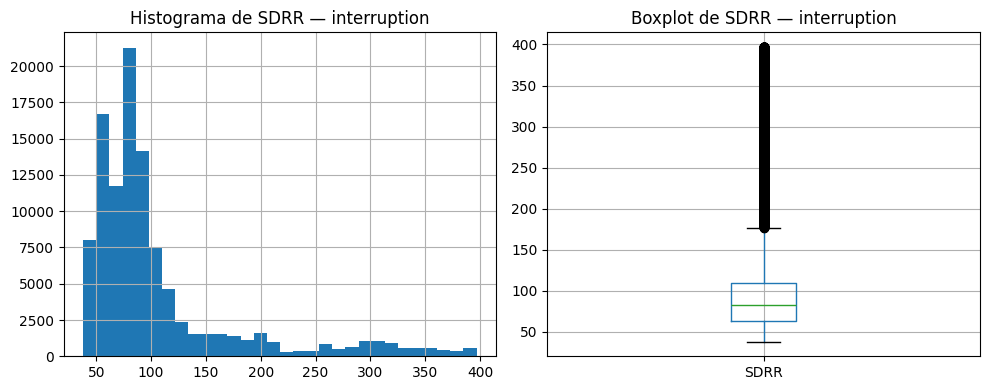

Coluna RMSSD:


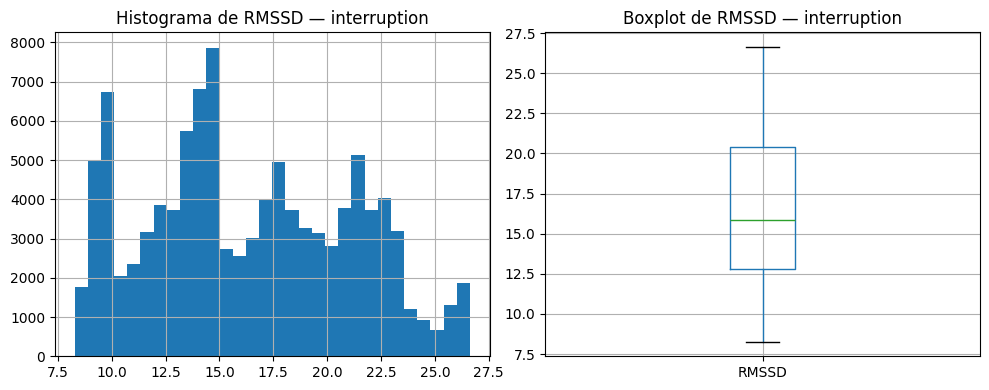

Coluna SDSD:


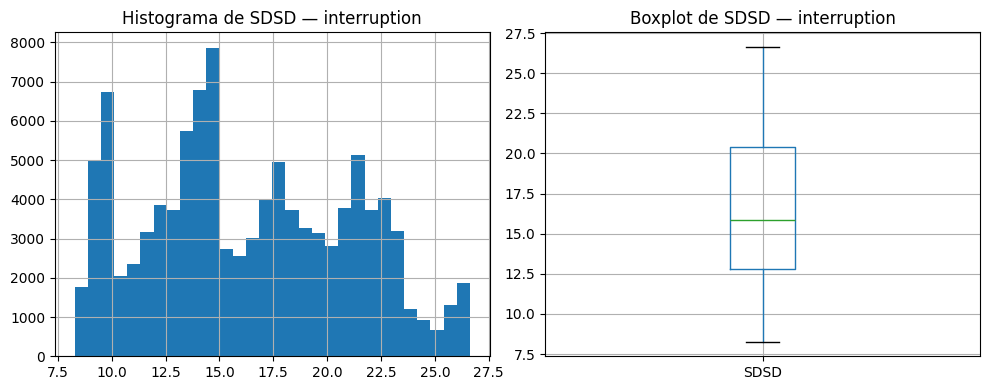

Coluna SDRR_RMSSD:


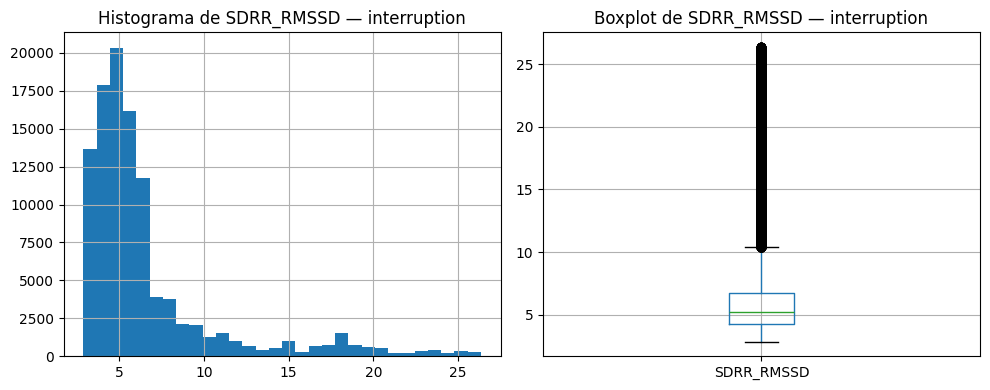

Coluna HR:


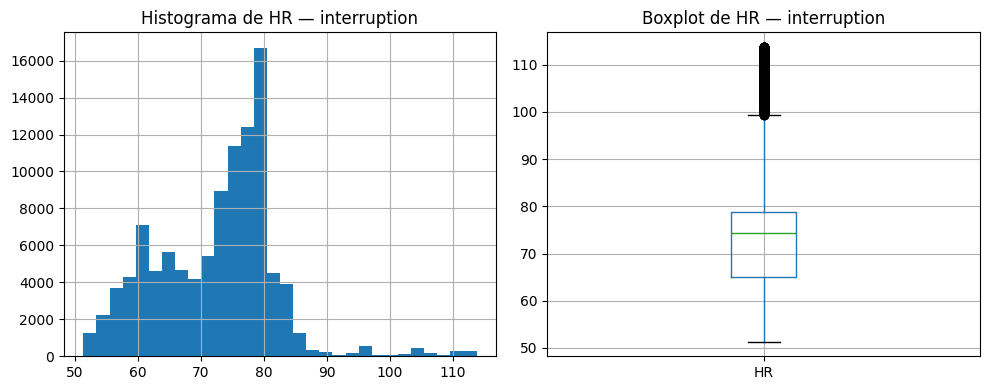

Coluna pNN25:


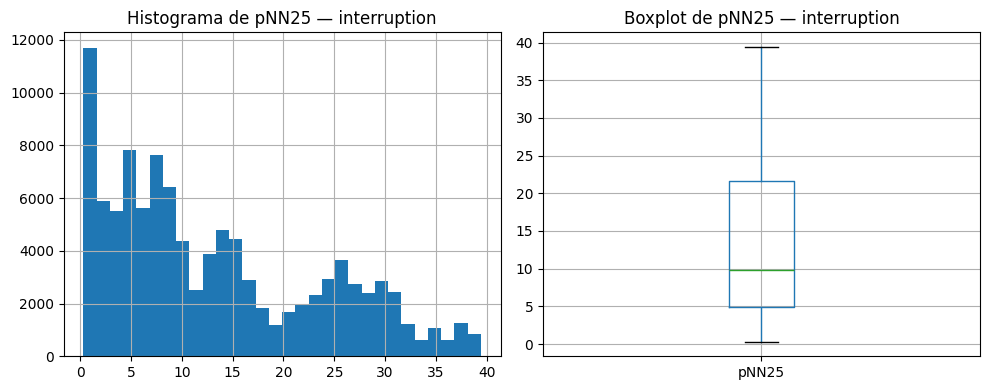

Coluna pNN50:


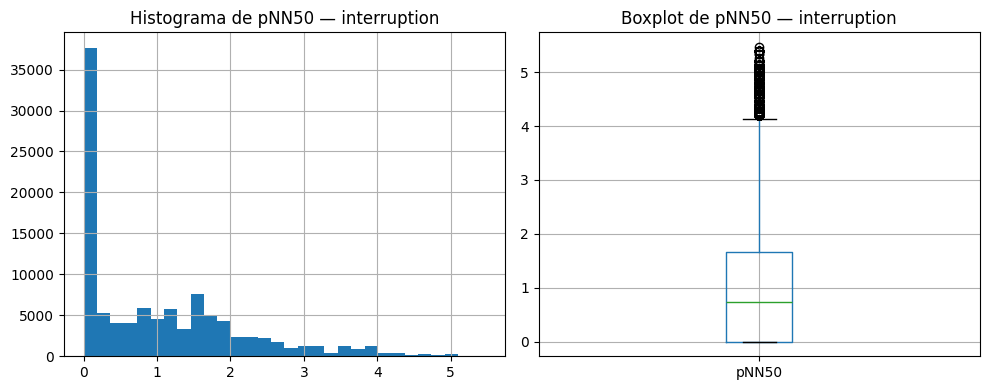

Coluna KURT:


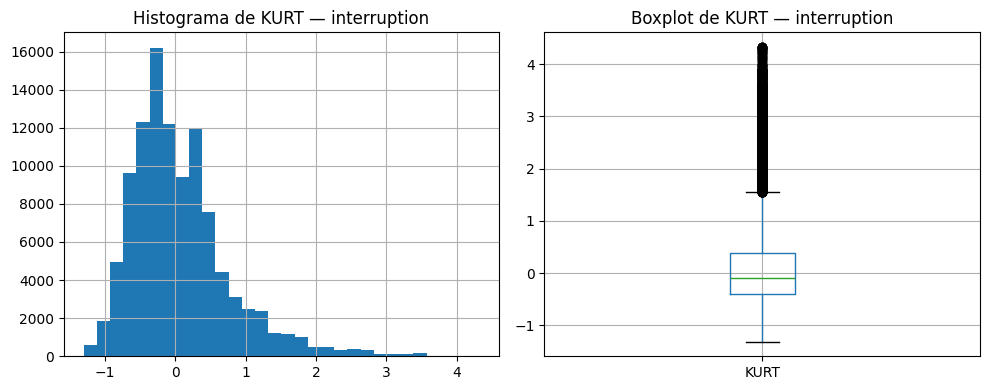

Coluna SKEW:


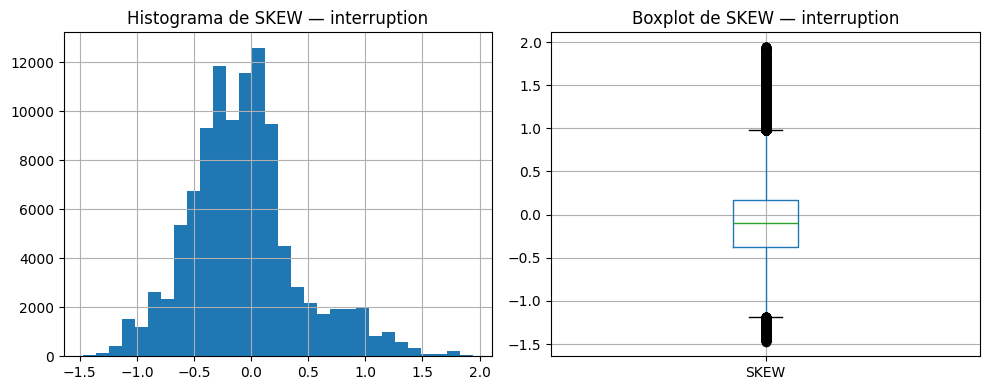

Coluna MEAN_REL_RR:


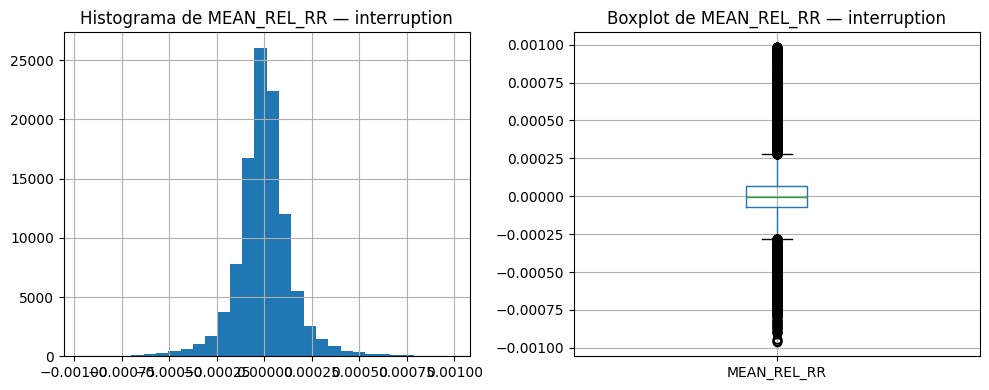

Coluna MEDIAN_REL_RR:


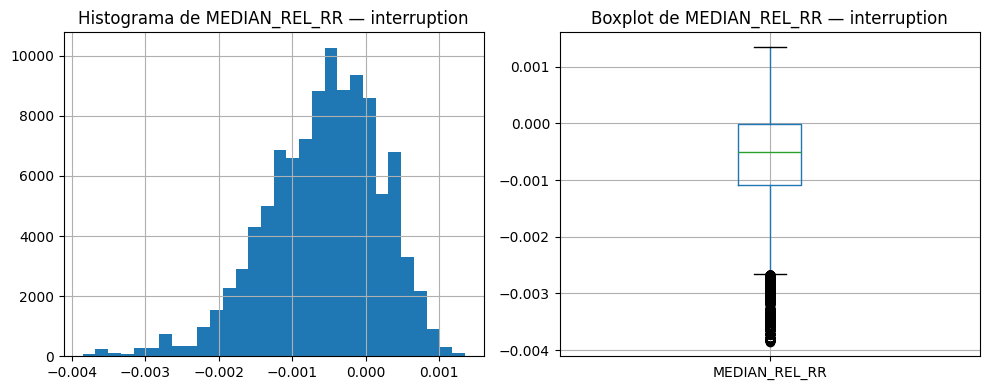

Coluna SDRR_REL_RR:


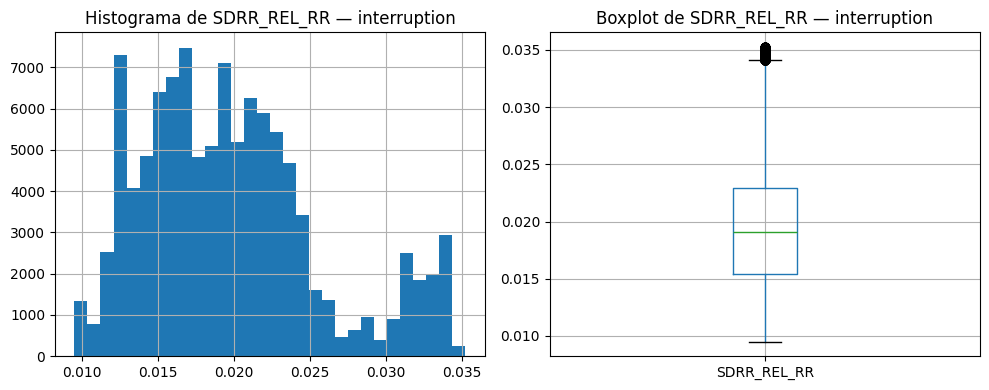

Coluna RMSSD_REL_RR:


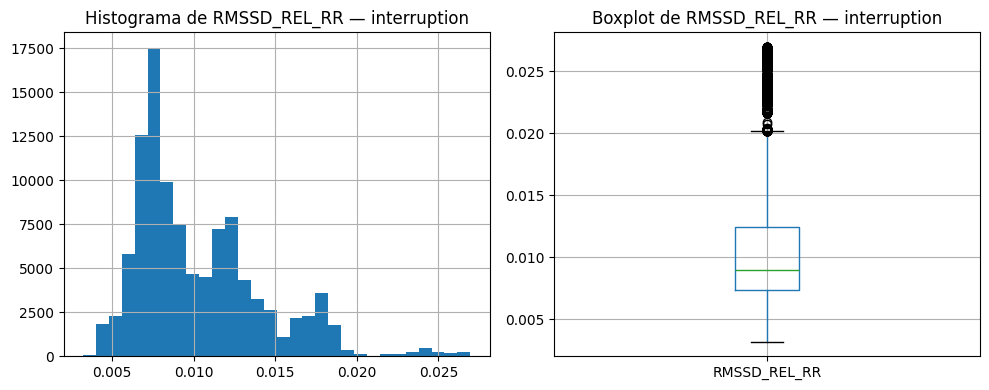

Coluna SDSD_REL_RR:


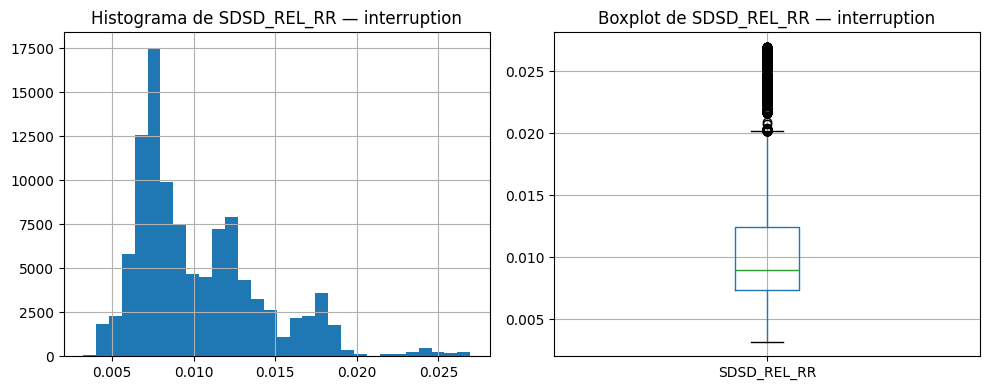

Coluna SDRR_RMSSD_REL_RR:


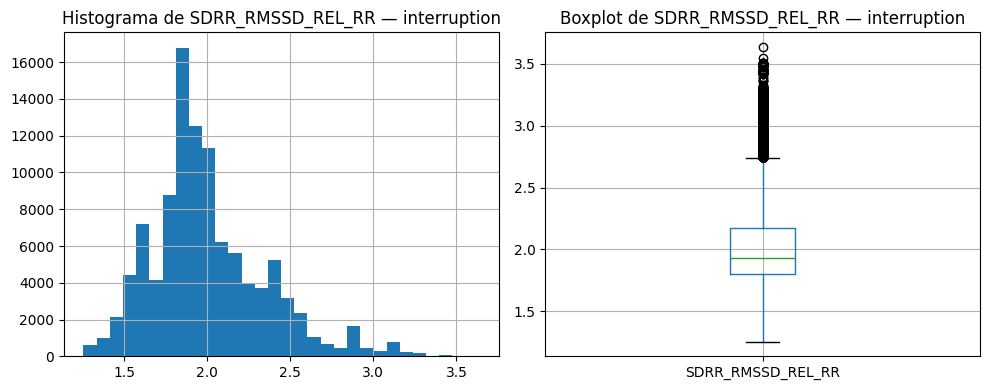

Coluna KURT_REL_RR:


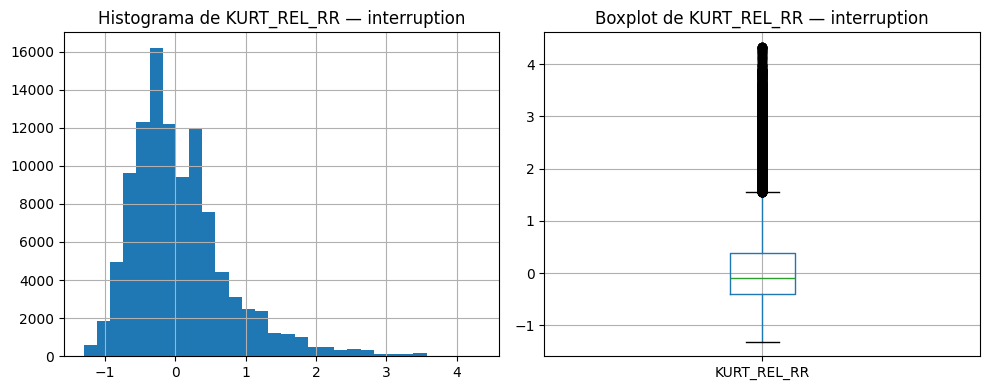

Coluna SKEW_REL_RR:


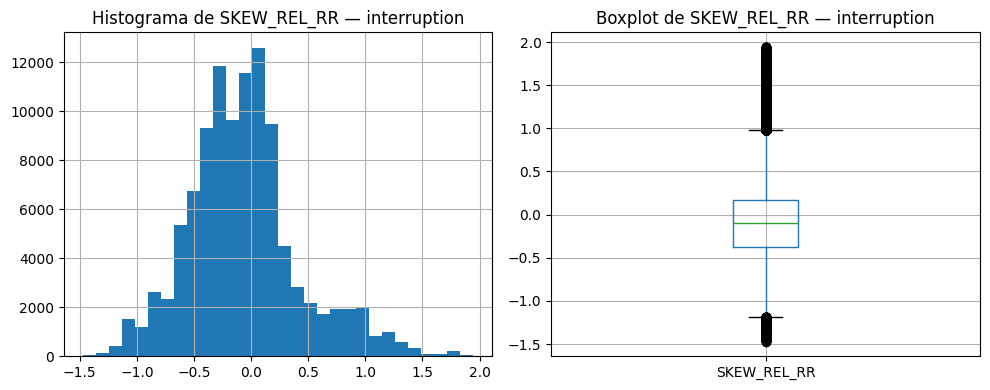

Coluna VLF:


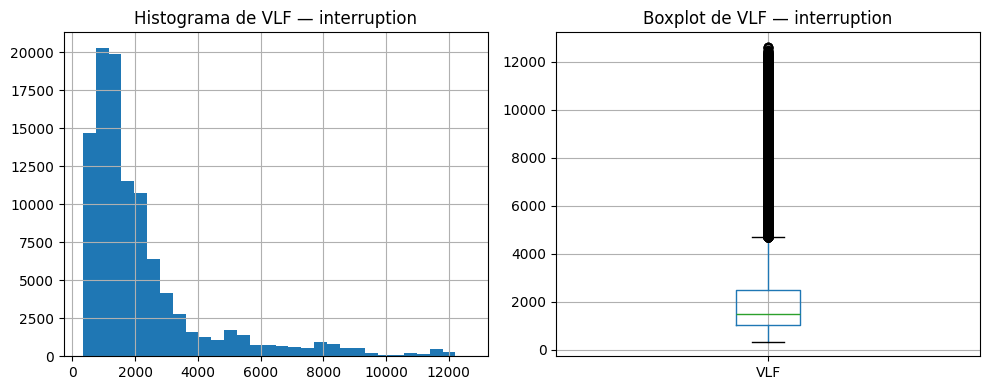

Coluna VLF_PCT:


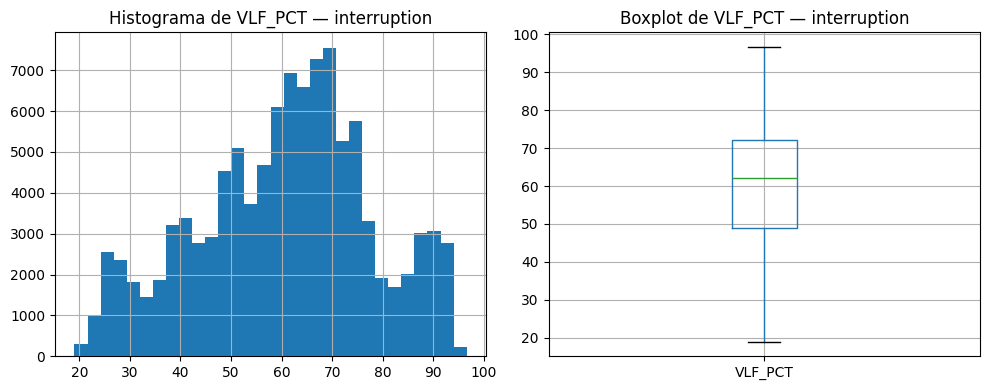

Coluna LF:


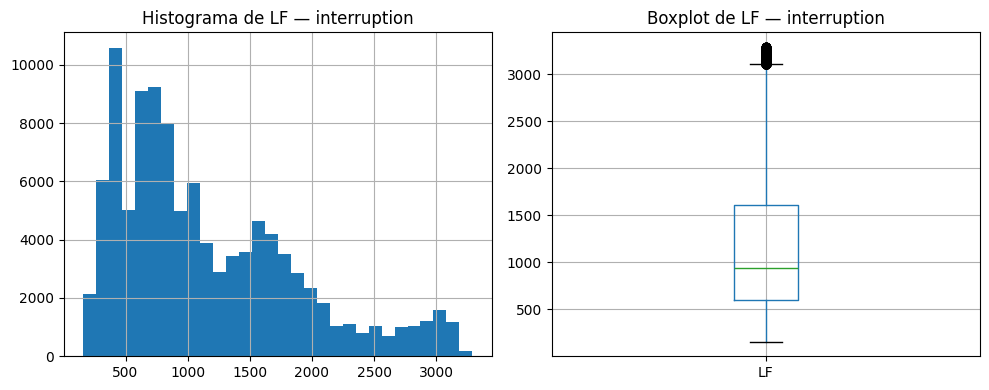

Coluna LF_PCT:


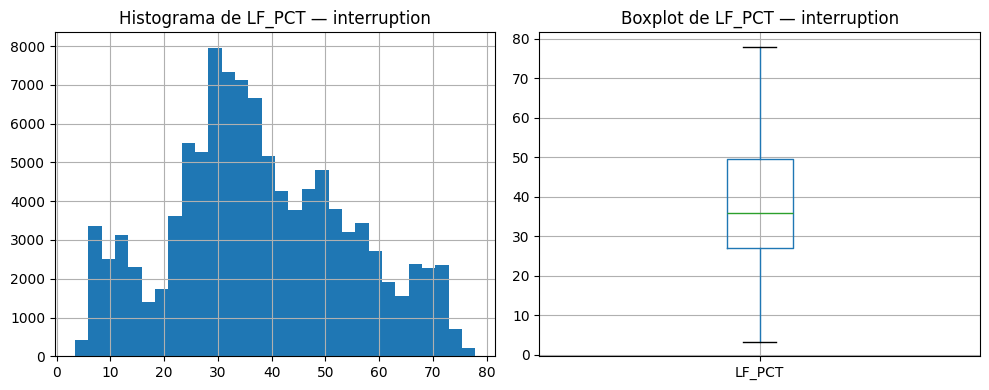

Coluna LF_NU:


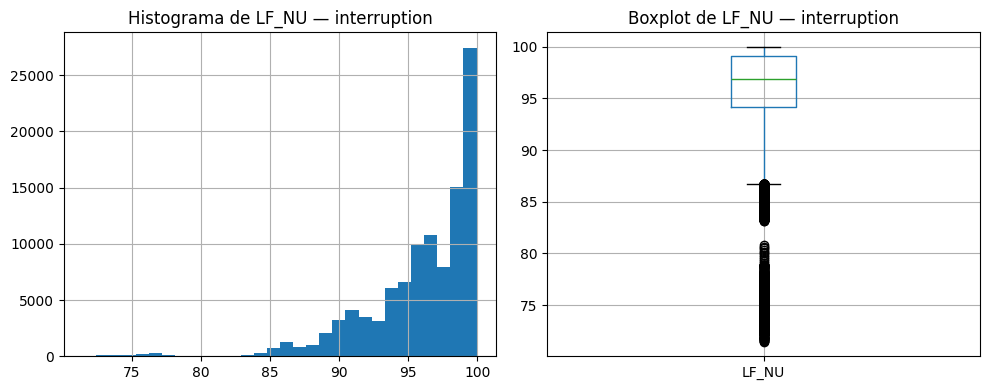

Coluna HF:


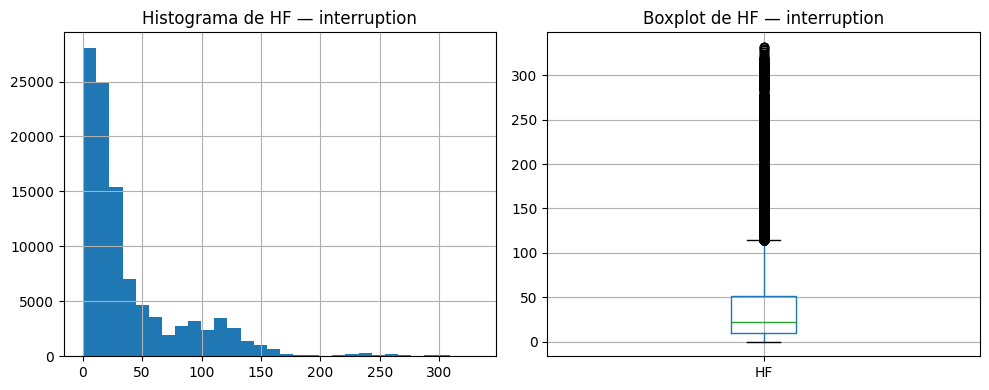

Coluna HF_PCT:


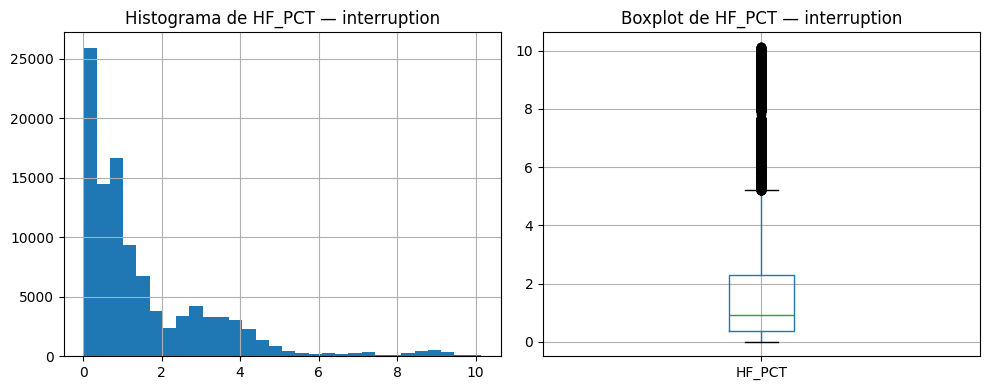

Coluna HF_NU:


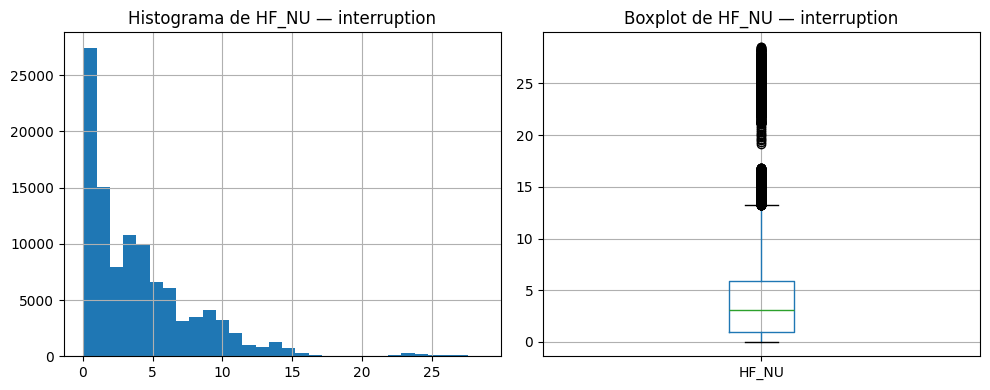

Coluna TP:


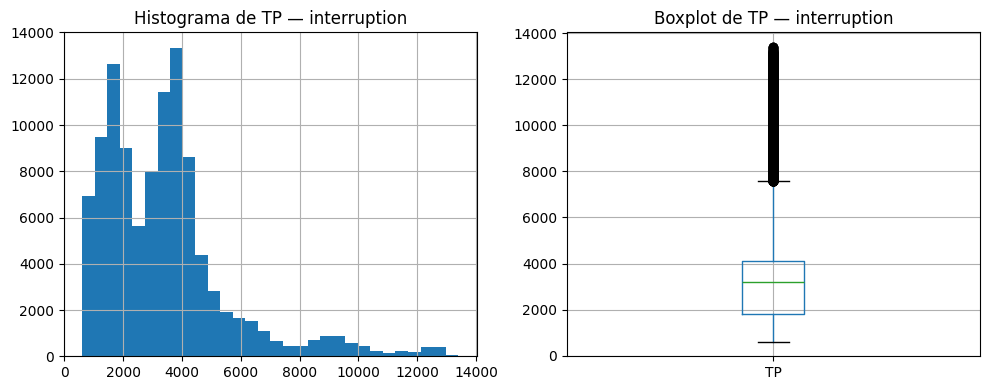

Coluna LF_HF:


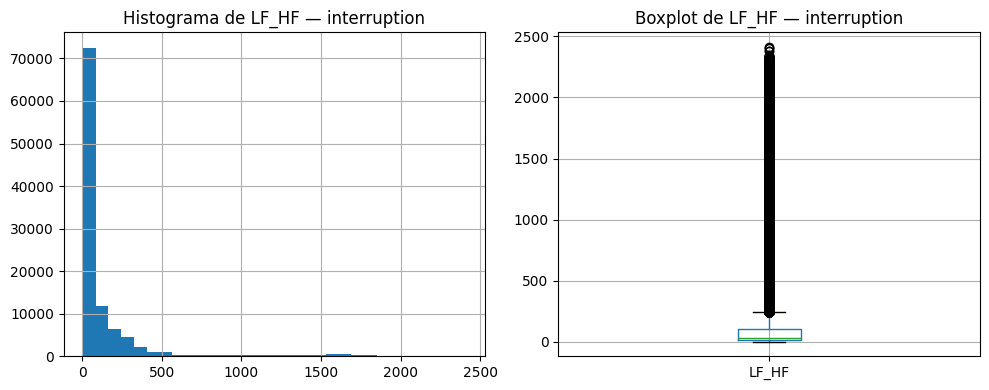

Coluna HF_LF:


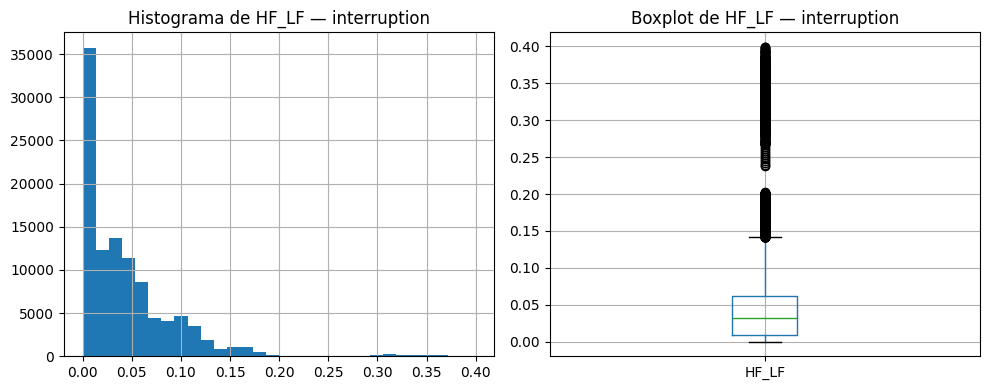

Coluna SD1:


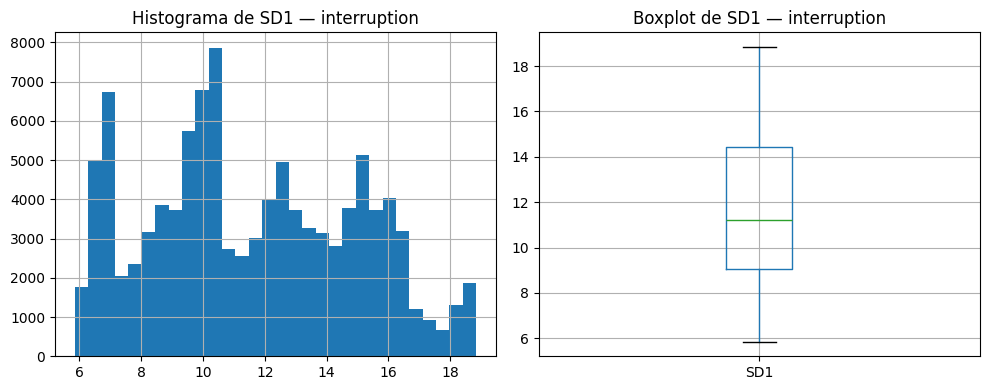

Coluna SD2:


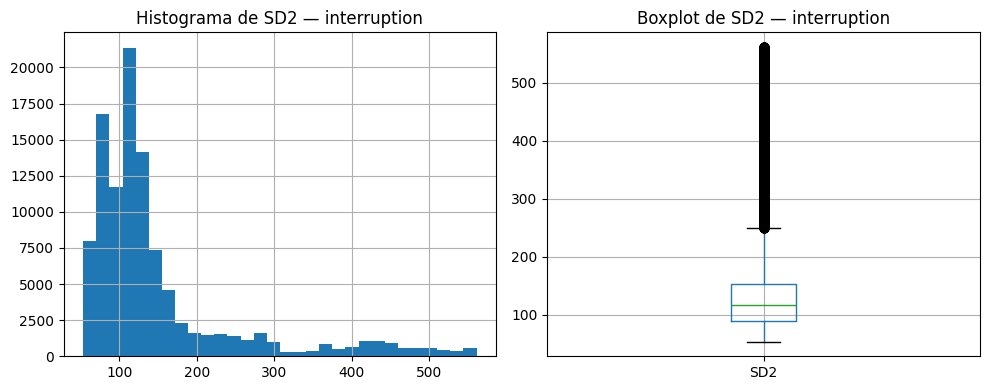

Coluna sampen:


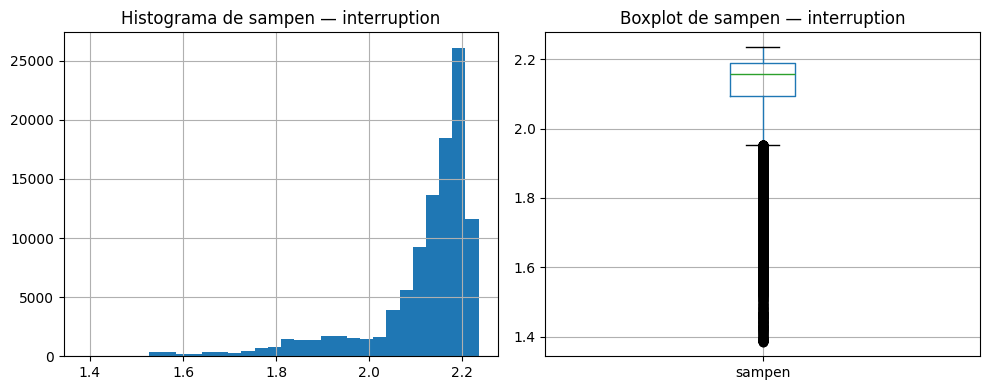

Coluna higuci:


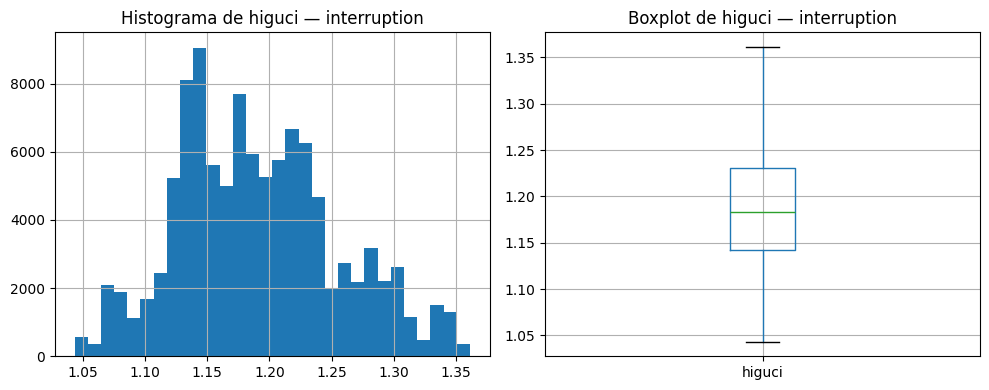

Coluna datasetId:


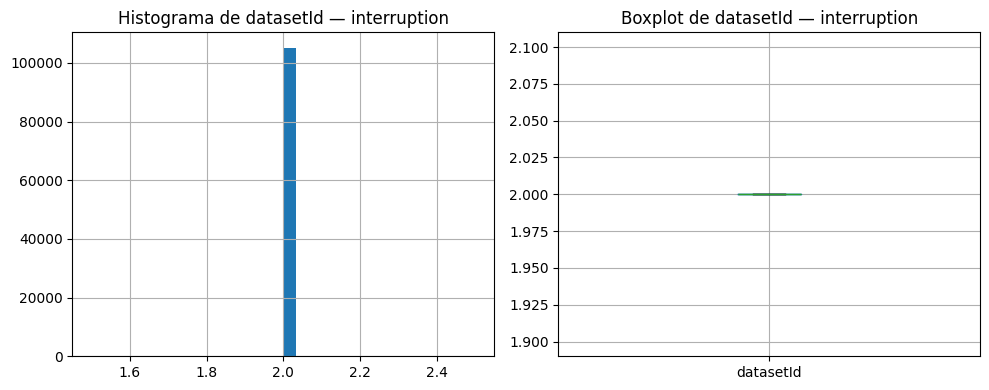


=== Condicao: time pressure ===
Coluna MEAN_RR:


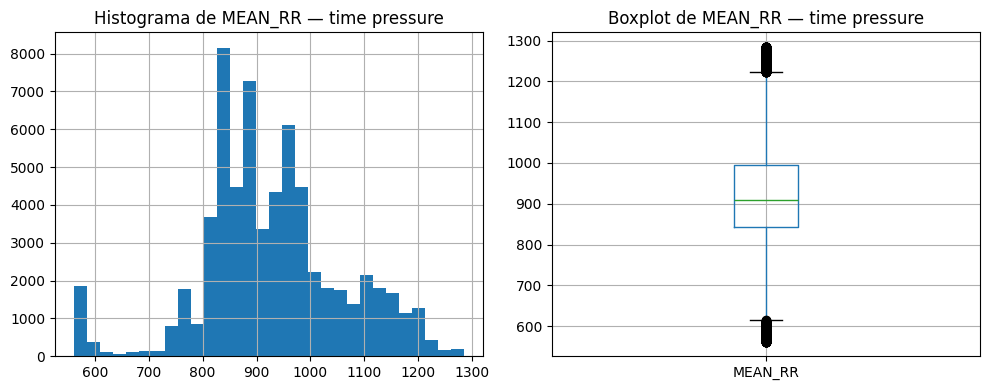

Coluna MEDIAN_RR:


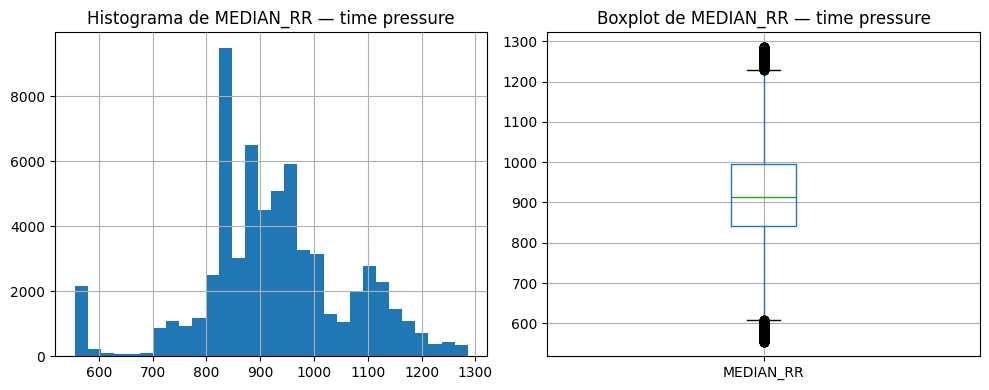

Coluna SDRR:


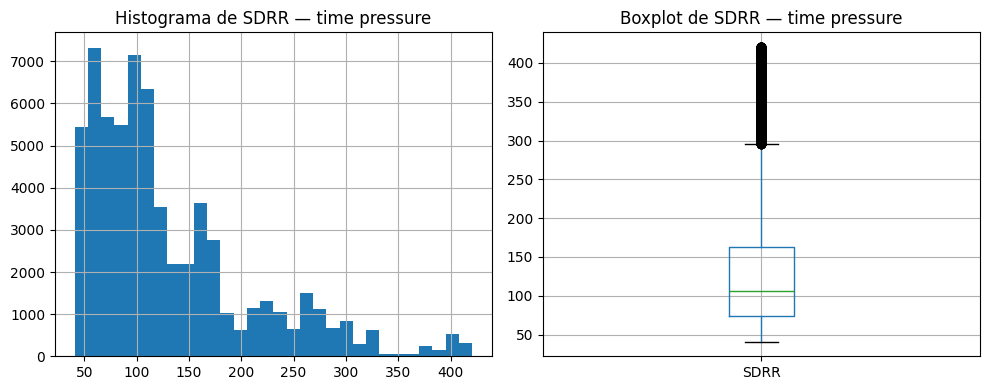

Coluna RMSSD:


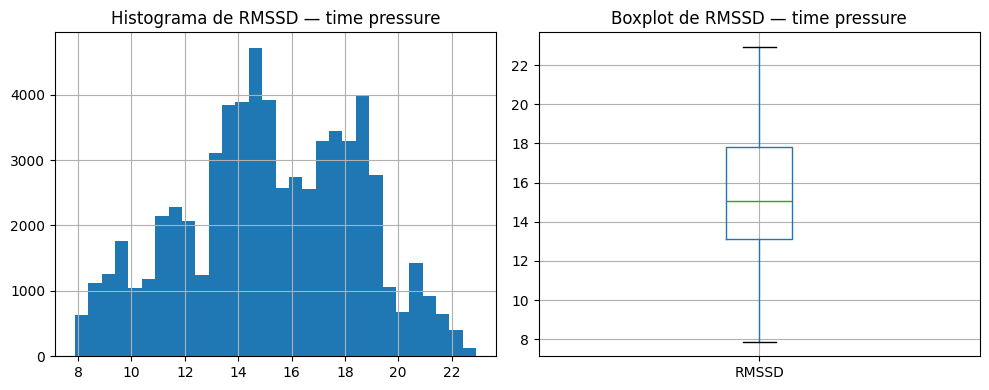

Coluna SDSD:


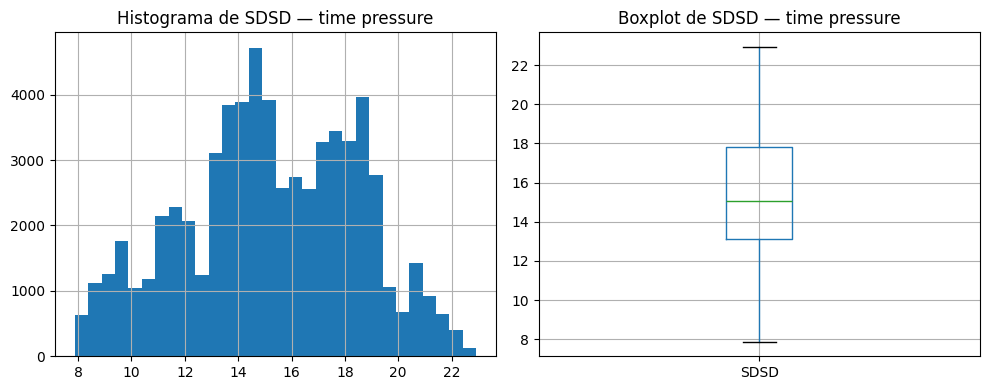

Coluna SDRR_RMSSD:


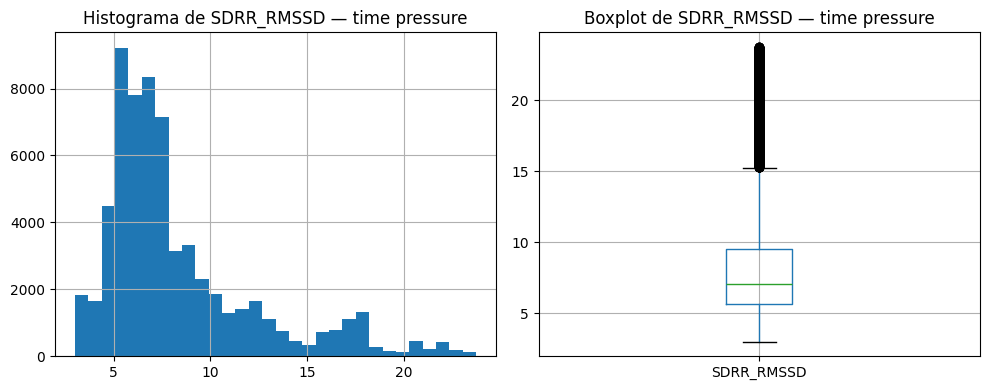

Coluna HR:


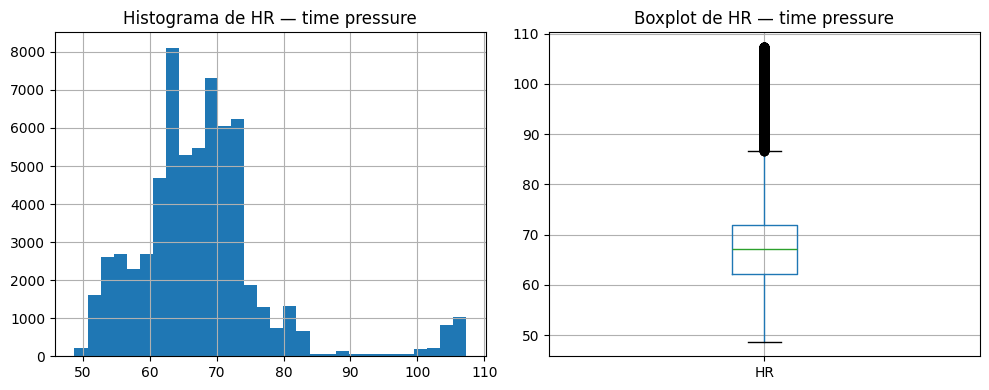

Coluna pNN25:


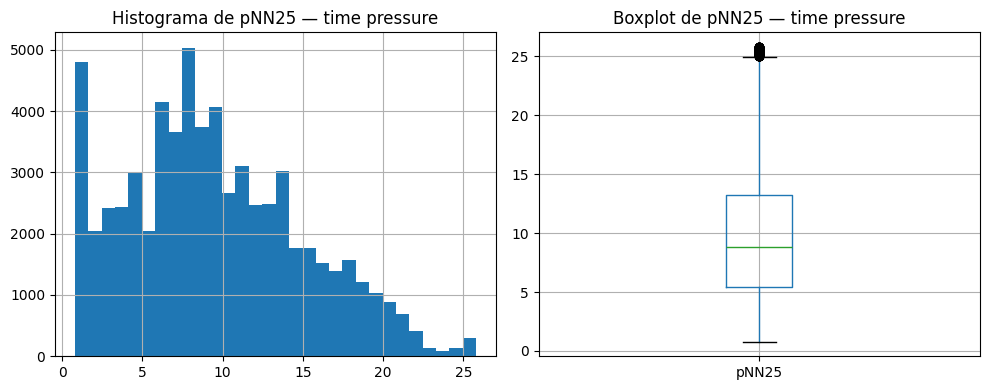

Coluna pNN50:


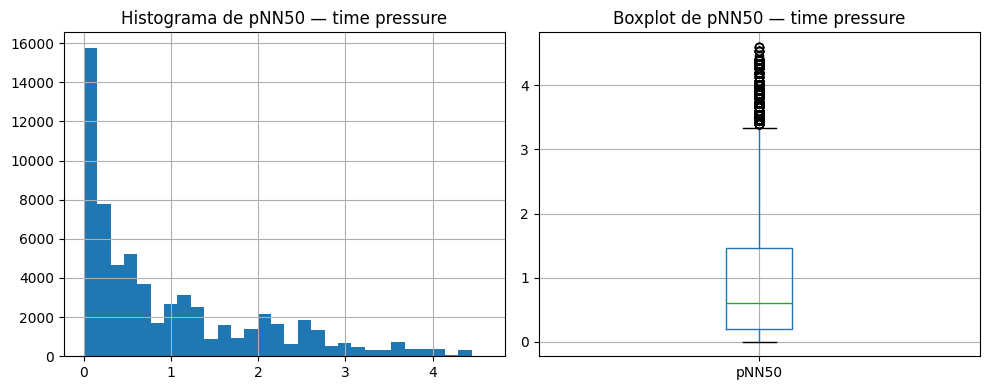

Coluna KURT:


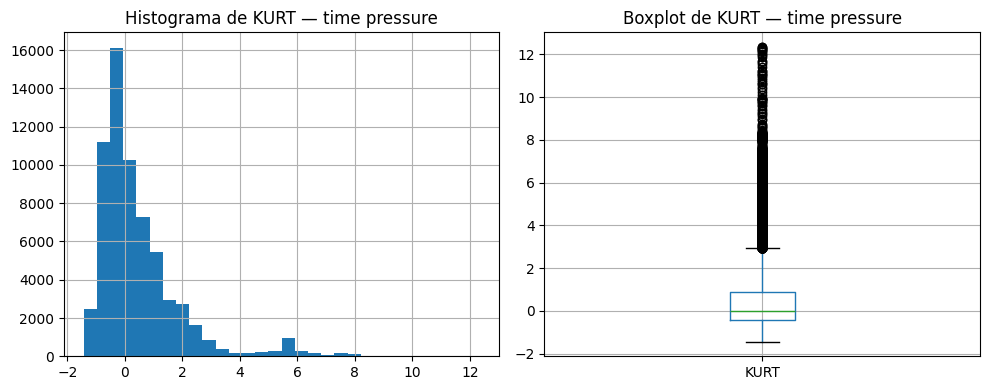

Coluna SKEW:


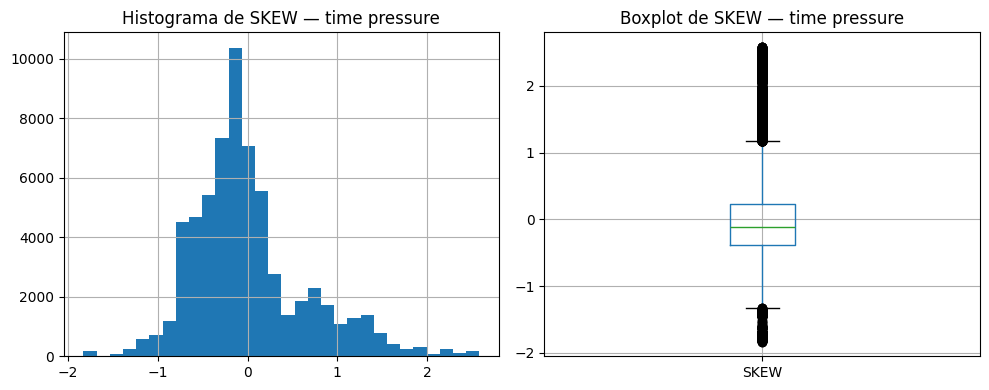

Coluna MEAN_REL_RR:


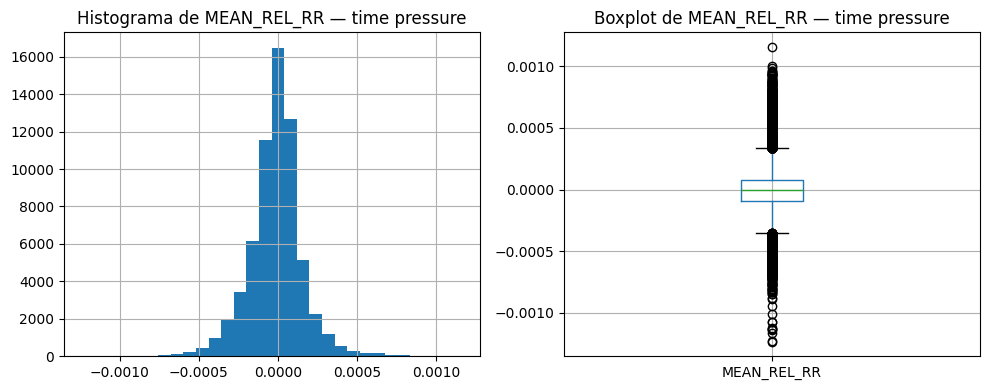

Coluna MEDIAN_REL_RR:


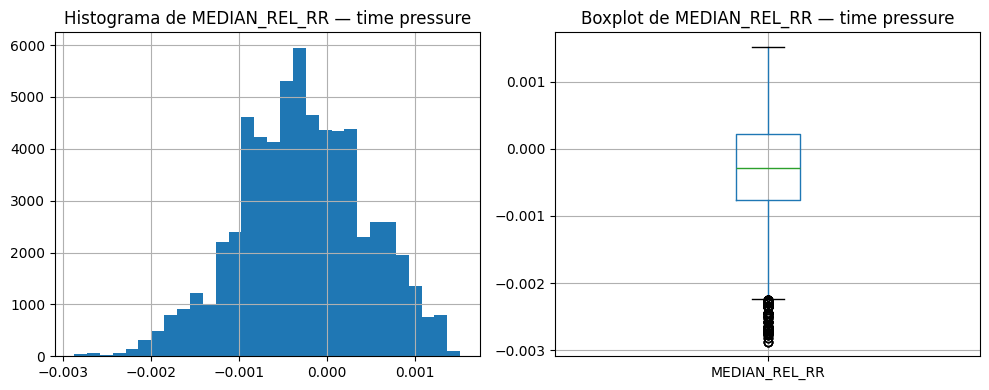

Coluna SDRR_REL_RR:


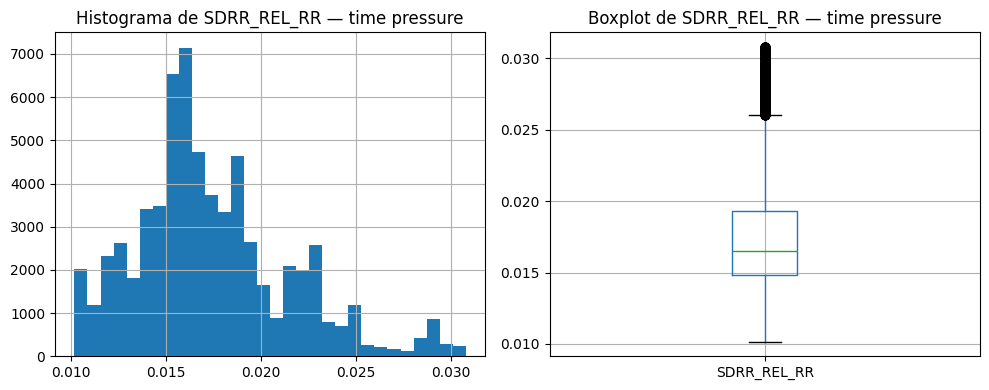

Coluna RMSSD_REL_RR:


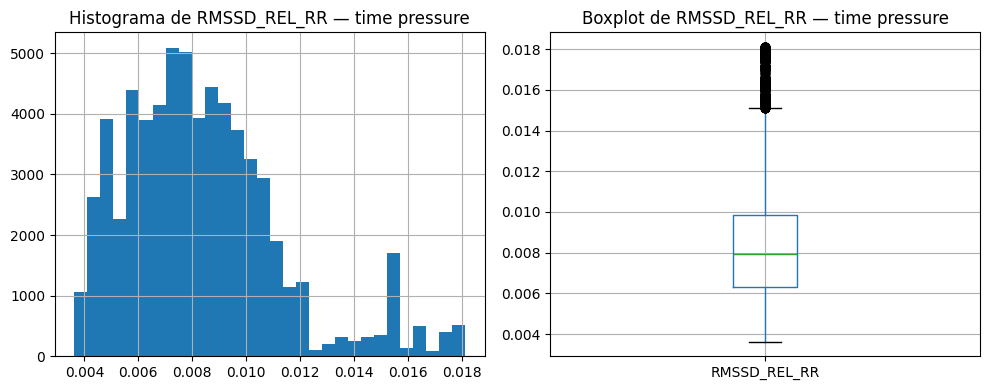

Coluna SDSD_REL_RR:


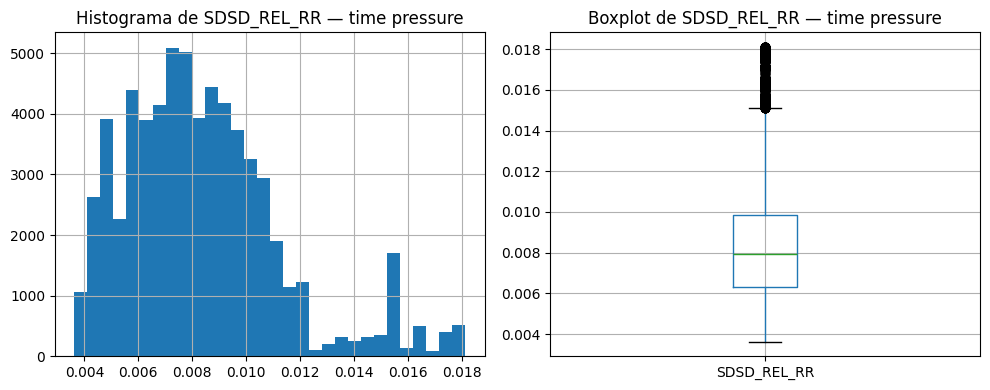

Coluna SDRR_RMSSD_REL_RR:


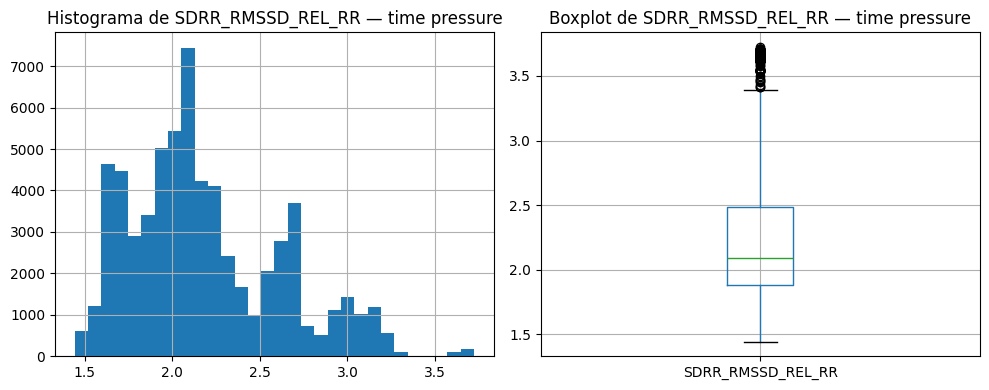

Coluna KURT_REL_RR:


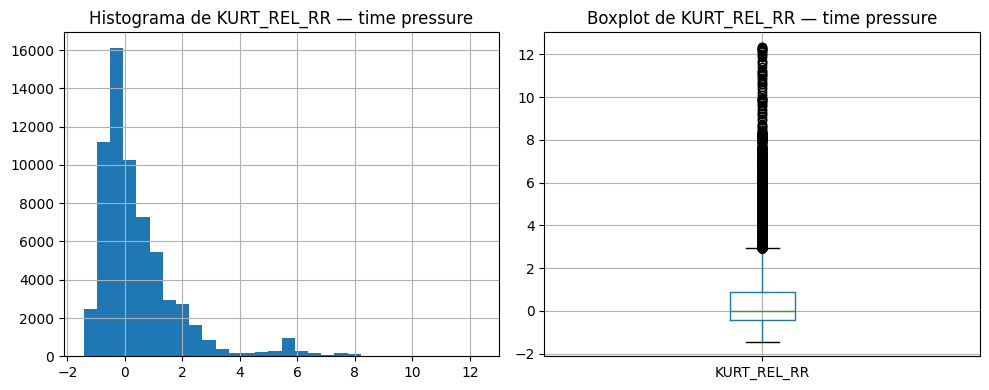

Coluna SKEW_REL_RR:


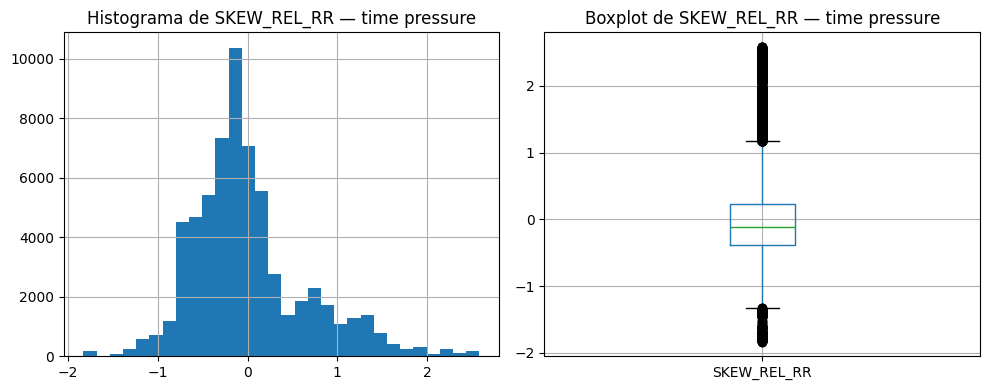

Coluna VLF:


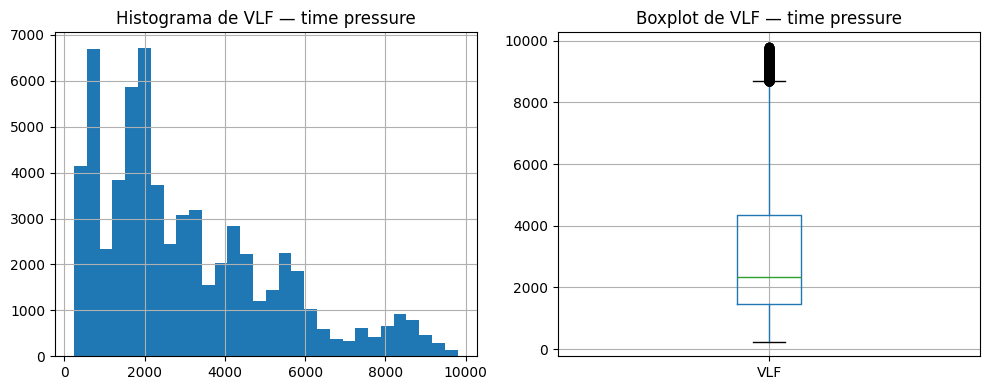

Coluna VLF_PCT:


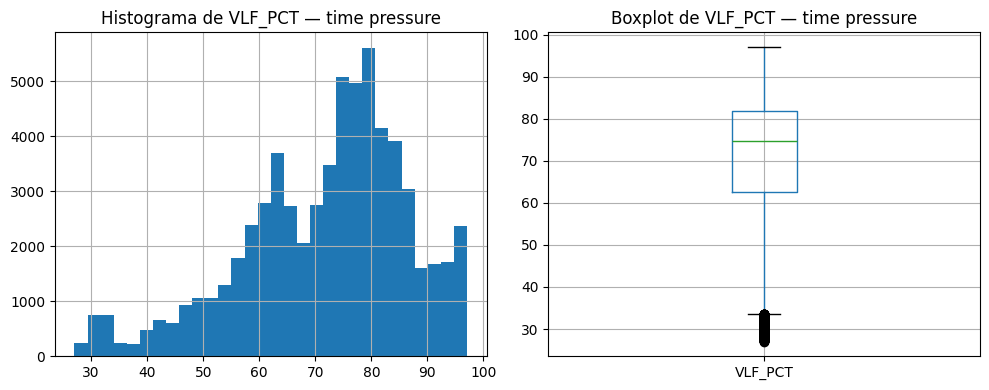

Coluna LF:


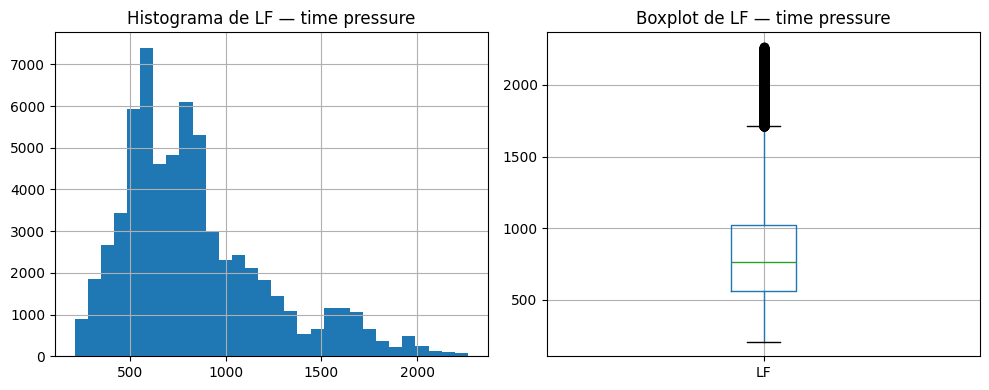

Coluna LF_PCT:


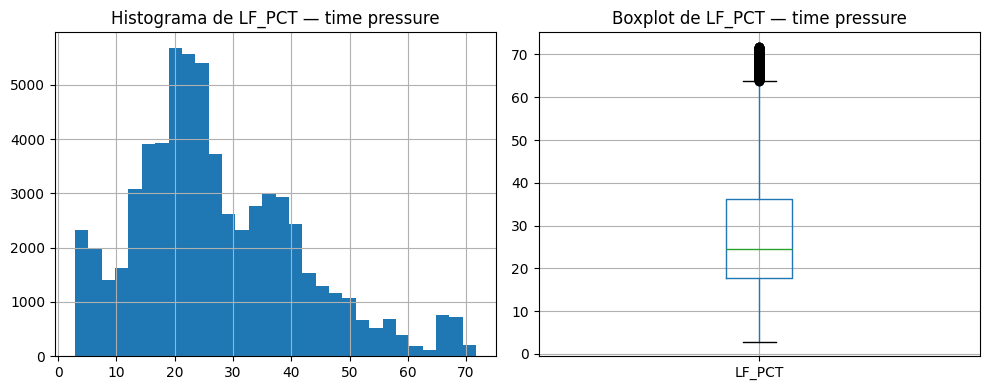

Coluna LF_NU:


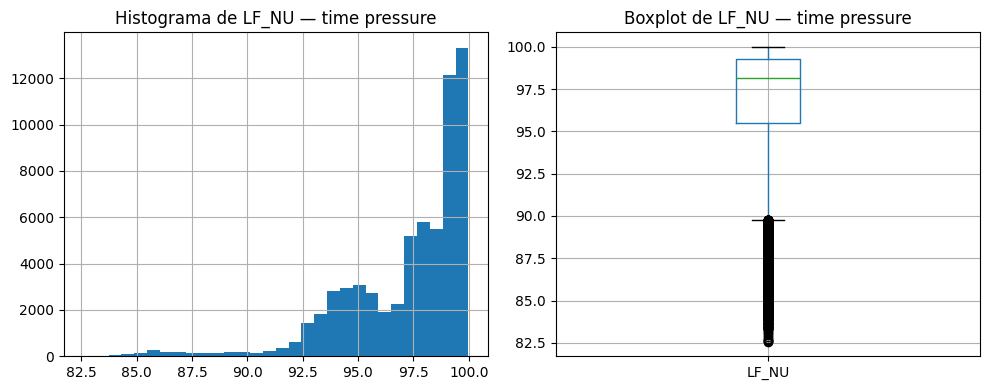

Coluna HF:


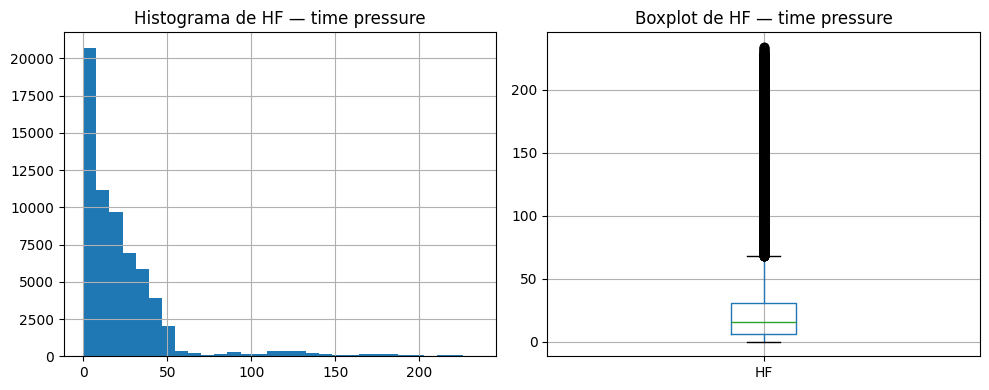

Coluna HF_PCT:


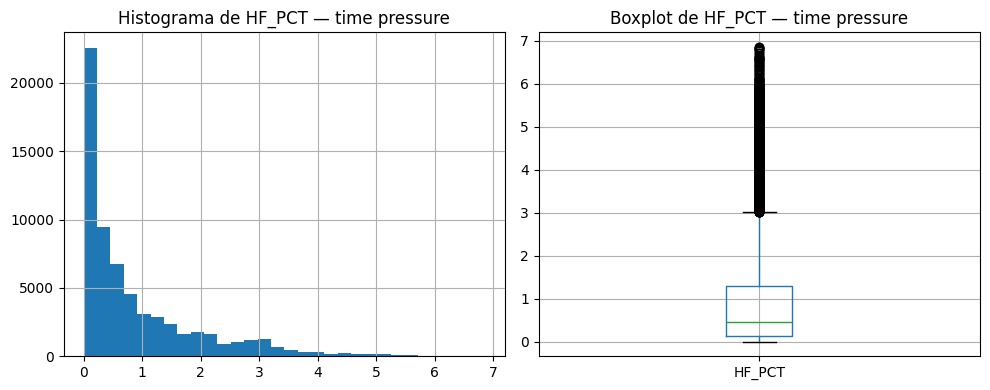

Coluna HF_NU:


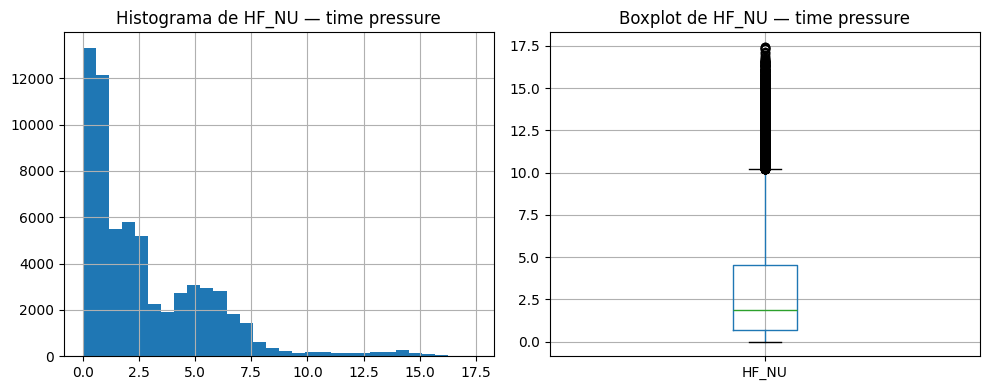

Coluna TP:


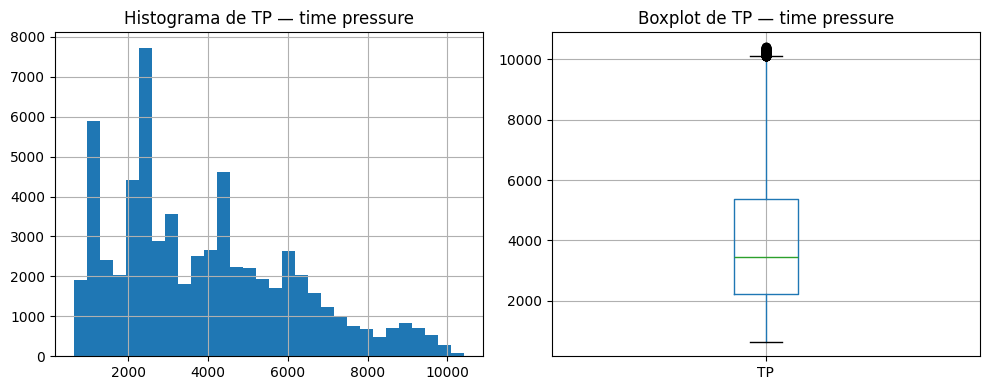

Coluna LF_HF:


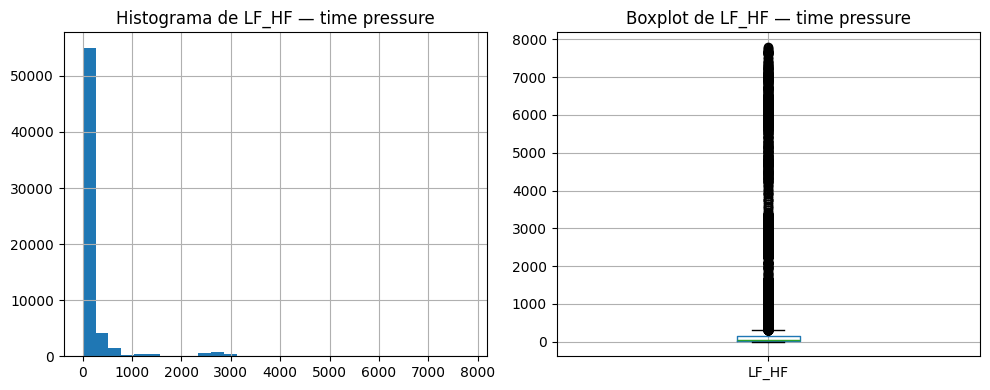

Coluna HF_LF:


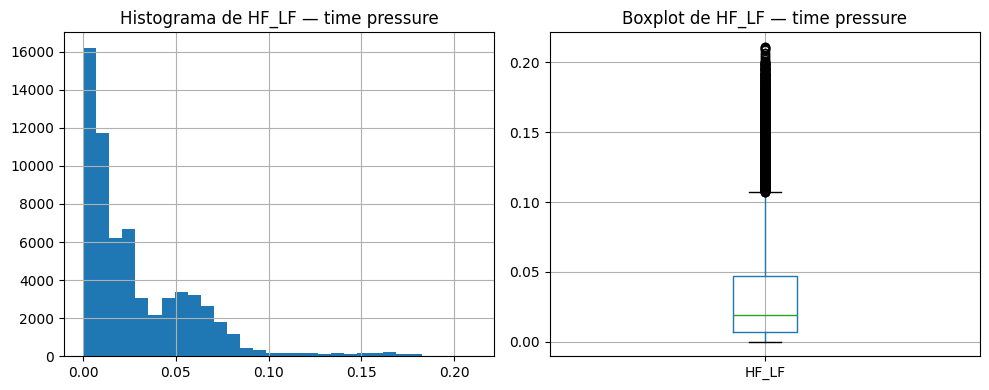

Coluna SD1:


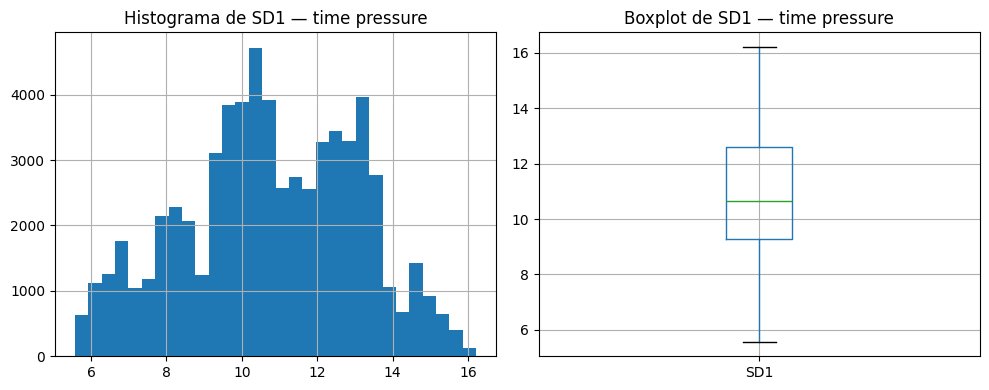

Coluna SD2:


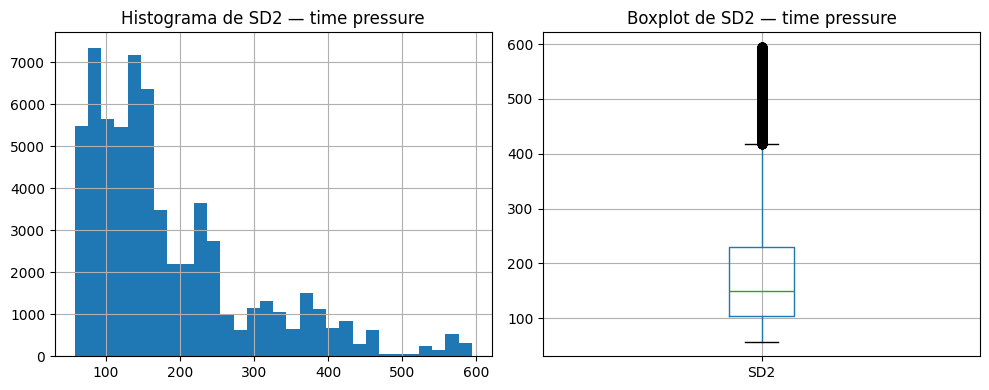

Coluna sampen:


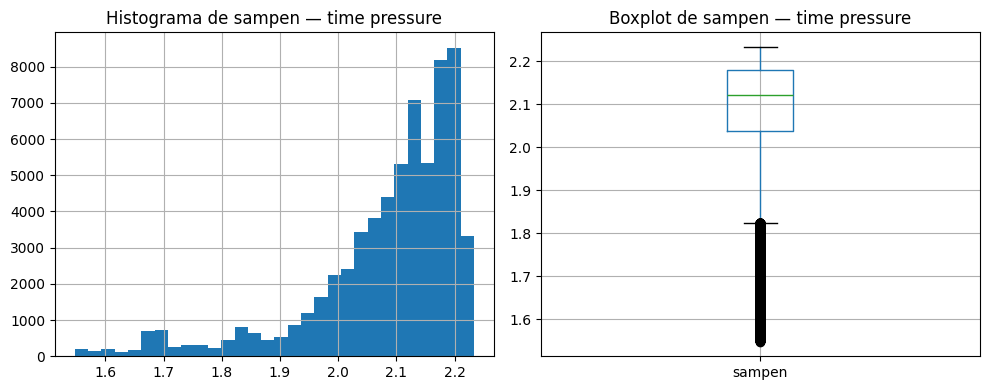

Coluna higuci:


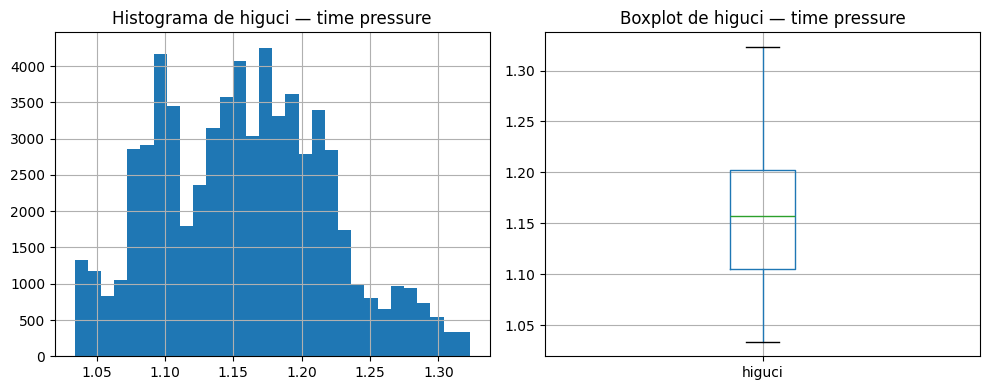

Coluna datasetId:


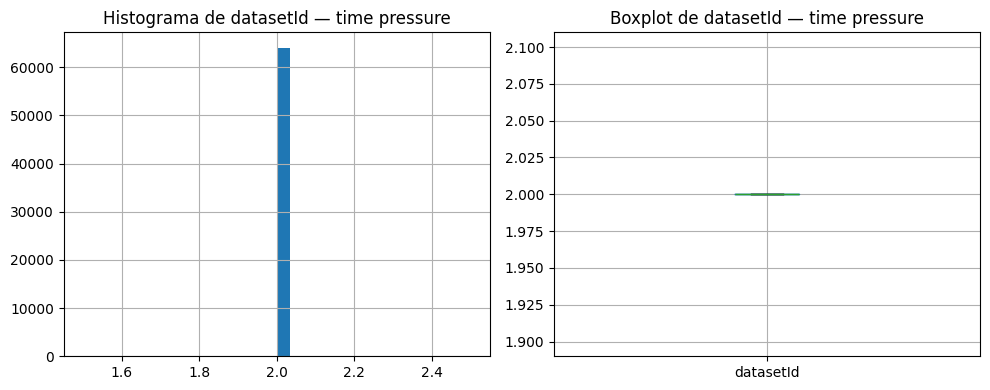

In [ ]:
condicoes = df['condition'].unique()

for cond in condicoes:
    print(f"\n=== Condicao: {cond} ===")
    subset = df.loc[df['condition'].eq(cond)]

    for i in num_cols:
        print(f"Coluna {i}:")
        s = subset[i]

        plt.figure(figsize=(10,4))

        plt.subplot(1,2,1)
        s.hist(bins=30)
        plt.title(f'Histograma de {i} — {cond}')

        plt.subplot(1,2,2)
        subset.boxplot(column=[i])
        plt.title(f'Boxplot de {i} — {cond}')

        plt.tight_layout()
        plt.show()


                    MEAN_RR  MEDIAN_RR      SDRR     RMSSD      SDSD  \
MEAN_RR            1.000000   0.960949  0.462882  0.333046  0.332950   
MEDIAN_RR          0.960949   1.000000  0.333753  0.309061  0.309021   
SDRR               0.462882   0.333753  1.000000  0.262933  0.262610   
RMSSD              0.333046   0.309061  0.262933  1.000000  1.000000   
SDSD               0.332950   0.309021  0.262610  1.000000  1.000000   
SDRR_RMSSD         0.332924   0.203815  0.914952 -0.067463 -0.067835   
HR                -0.944552  -0.929640 -0.202327 -0.284871 -0.284863   
pNN25              0.286793   0.270630  0.136393  0.951750  0.951771   
pNN50              0.245215   0.196992  0.473307  0.794846  0.794774   
KURT              -0.292933  -0.284508 -0.096440 -0.178586 -0.178621   
SKEW              -0.197770  -0.317130  0.276610 -0.053997 -0.054125   
MEAN_REL_RR       -0.016858  -0.018019  0.000217 -0.024209 -0.024228   
MEDIAN_REL_RR      0.009506  -0.006349  0.196399 -0.437706 -0.43

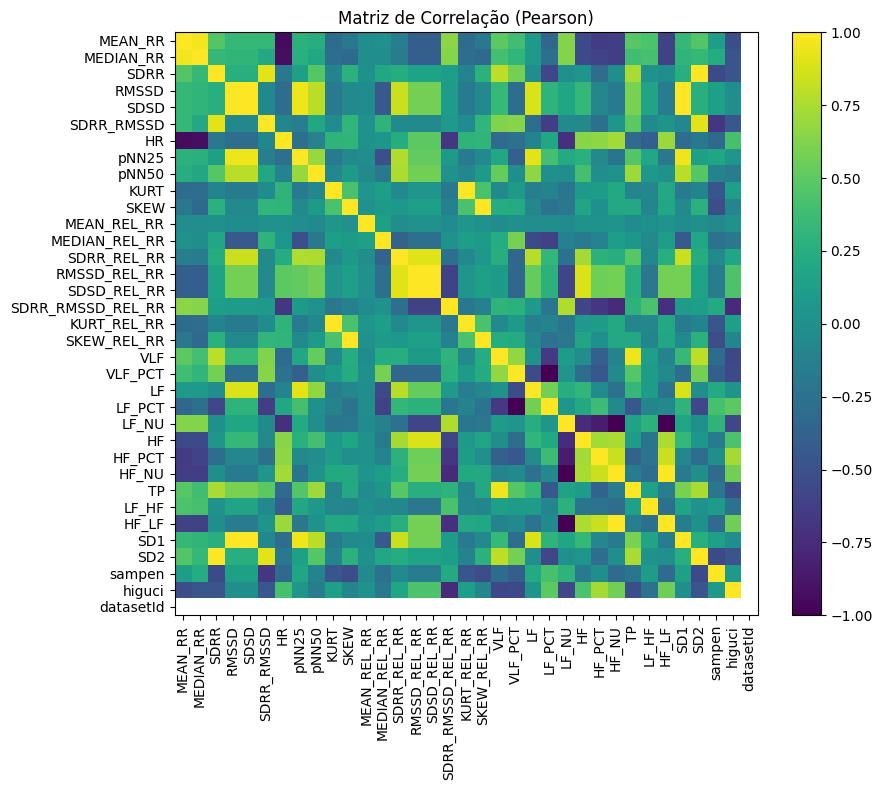

In [ ]:
corr = df[num_cols].corr(numeric_only=True)
print(corr)

plt.figure(figsize=(10,8))
im = plt.imshow(corr.values, vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Matriz de Correlação (Pearson)')
plt.tight_layout(); 
plt.show()

In [ ]:
cols_sel = num_cols

cores = {'no stress':'C0', 'interruption':'C1', 'time pressure':'C2'}
classes = ['no stress','interruption','time pressure']
print(len(cols_sel))

for i in range(len(cols_sel)):
    for j in range(i+1, len(cols_sel)):
        a, b = cols_sel[i], cols_sel[j]
        print(i, j, a, b)
        plt.figure(figsize=(5,4))
        for cls in classes:
            sub = df.loc[df['condition'].eq(cls), [a,b]]
            plt.scatter(sub[a], sub[b], s=6, alpha=0.5, label=cls)
        plt.xlabel(a); plt.ylabel(b); plt.legend(markerscale=2)
        plt.title(f'Scatter: {a} x {b}')
        plt.tight_layout()
        img_save(f'Scatter {a} x {b}')


In [ ]:
# AUTOR: Osvaldo
# Lista das colunas a serem visualizadas (sem as colunas não numéricas e a própria condição)
colunas_a_visualizar = df.drop(columns=['uuid', 'datasetId', 'condition']).columns

# Obter as cores padrão do Seaborn para usar nas linhas e textos
palette = sns.color_palette()
conditions = df['condition'].unique()
color_map = {condition: color for condition, color in zip(conditions, palette)}

# Loop para criar os gráficos para cada coluna
for coluna in colunas_a_visualizar:
    print(f"--- Análise condicional da variável: {coluna} ---")

    # Criar uma figura com dois subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Aumentei um pouco o tamanho

    # --- Gráfico 1: Histogramas sobrepostos ---
    sns.histplot(data=df, x=coluna, hue='condition', kde=True, ax=axes[0])
    axes[0].set_title(f'Histogramas de {coluna}')

    # --- NOVO: Adicionar linhas de média no histograma ---
    for i, condition in enumerate(conditions):
        # Filtra os dados para a condição atual
        subset = df[df['condition'] == condition]
        # Calcula a média
        mean_val = subset[coluna].mean()
        # Adiciona uma linha vertical na média
        axes[0].axvline(mean_val, color=color_map[condition], linestyle='--', linewidth=2,
                        label=f'Média ({condition}) = {mean_val:.2f}')

    axes[0].legend() # Mostra a legenda com os valores das médias

    # --- Gráfico 2: Box-plots comparativos ---
    sns.boxplot(data=df, x='condition', y=coluna, ax=axes[1])
    axes[1].set_title(f'Box-plots de {coluna}')

    # --- NOVO: Calcular e exibir média e desvio padrão no box-plot ---
    # Usaremos groupby para calcular as estatísticas para cada condição de uma vez
    stats = df.groupby('condition')[coluna].agg(['mean', 'std']).reset_index()

    # Define a posição do texto no eixo x (0 para a primeira condição, 1 para a segunda, etc.)
    x_coords = range(len(stats))

    # Adiciona o texto para cada condição
    for i, row in stats.iterrows():
        text_str = f"Média: {row['mean']:.2f}\nDP: {row['std']:.2f}"
        axes[1].text(x_coords[i], axes[1].get_ylim()[1] * 0.9, text_str,
                     horizontalalignment='center', size='medium', color='black', weight='semibold',
                     bbox=dict(facecolor='white', alpha=0.5))

    # Mostrar a figura
    plt.tight_layout()
    img_save(f'Analise_Condicional/{coluna}')

--- Análise condicional da variável: MEAN_RR ---
--- Análise condicional da variável: MEDIAN_RR ---
--- Análise condicional da variável: SDRR ---
--- Análise condicional da variável: RMSSD ---
--- Análise condicional da variável: SDSD ---
--- Análise condicional da variável: SDRR_RMSSD ---
--- Análise condicional da variável: HR ---
--- Análise condicional da variável: pNN25 ---
--- Análise condicional da variável: pNN50 ---
--- Análise condicional da variável: KURT ---
--- Análise condicional da variável: SKEW ---
--- Análise condicional da variável: MEAN_REL_RR ---
--- Análise condicional da variável: MEDIAN_REL_RR ---
--- Análise condicional da variável: SDRR_REL_RR ---
--- Análise condicional da variável: RMSSD_REL_RR ---
--- Análise condicional da variável: SDSD_REL_RR ---
--- Análise condicional da variável: SDRR_RMSSD_REL_RR ---
--- Análise condicional da variável: KURT_REL_RR ---
--- Análise condicional da variável: SKEW_REL_RR ---
--- Análise condicional da variável: VLF ---
-

In [ ]:
# AUTOR: Osvaldo
# Lista das colunas a serem visualizadas (sem as colunas não numéricas e a própria condição)
colunas_a_visualizar = df.drop(columns=['uuid', 'datasetId', 'condition']).columns

# Loop para criar os gráficos para cada coluna
for coluna in colunas_a_visualizar:
    print(f"--- Análise condicional da variável: {coluna} ---")

    # Criar uma figura com dois subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogramas sobrepostos
    sns.histplot(data=df, x=coluna, hue='condition', kde=True, ax=axes[0])
    axes[0].set_title(f'Histogramas de {coluna}')

    # Box-plots comparativos
    sns.boxplot(data=df, x='condition', y=coluna, ax=axes[1])
    axes[1].set_title(f'Box-plots de {coluna}')

    # Mostrar a figura
    plt.tight_layout()
    img_save(f'Analise_Condicional_HistBox/{coluna}')

--- Análise condicional da variável: MEAN_RR ---
--- Análise condicional da variável: MEDIAN_RR ---
--- Análise condicional da variável: SDRR ---
--- Análise condicional da variável: RMSSD ---
--- Análise condicional da variável: SDSD ---
--- Análise condicional da variável: SDRR_RMSSD ---
--- Análise condicional da variável: HR ---
--- Análise condicional da variável: pNN25 ---
--- Análise condicional da variável: pNN50 ---
--- Análise condicional da variável: KURT ---
--- Análise condicional da variável: SKEW ---
--- Análise condicional da variável: MEAN_REL_RR ---
--- Análise condicional da variável: MEDIAN_REL_RR ---
--- Análise condicional da variável: SDRR_REL_RR ---
--- Análise condicional da variável: RMSSD_REL_RR ---
--- Análise condicional da variável: SDSD_REL_RR ---
--- Análise condicional da variável: SDRR_RMSSD_REL_RR ---
--- Análise condicional da variável: KURT_REL_RR ---
--- Análise condicional da variável: SKEW_REL_RR ---
--- Análise condicional da variável: VLF ---
-